In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Ds_Data.csv')
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
data.shape

(12684, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

#Data Preprocessing

Find the Missing values

In [5]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [6]:
data.isnull().sum()/len(data)*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000
has_children,0.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

features with missing data:

- car - 99.144678 - Object data
- Bar	- 0.855322 - Object data
- CoffeeHouse	- 1.734850 - Object data
- CarryAway	- 1.194223 - Object data
- RestaurantLessThan20	- 1.032841 - Object data
- Restaurant20To50	- 1.516985 - Object data

- Droping the car column as it has 99.14% of missing values

In [8]:
#Droping car column
data =data.drop(['car'], axis=1)

- imputting the missing data 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'

In [9]:
data['Bar'].describe()

,Bar
count,12577
unique,5
top,never
freq,5197


In [10]:
data['Bar'].value_counts()

,count
Bar,
never,5197
less1,3482
1~3,2473
4~8,1076
gt8,349


In [11]:
data['Bar'].mode()

,Bar
0,never


In [12]:
data['Bar'] = data['Bar'].fillna('never')

In [13]:
#Column CoffeeHouse
data['CoffeeHouse'].describe()

,CoffeeHouse
count,12467
unique,5
top,less1
freq,3385


In [14]:
data['CoffeeHouse'].value_counts()

,count
CoffeeHouse,
less1,3385
1~3,3225
never,2962
4~8,1784
gt8,1111


In [15]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')

In [16]:
#Column CarryAway
data['CarryAway'].describe()

,CarryAway
count,12533
unique,5
top,1~3
freq,4672


In [17]:
data['CarryAway'].value_counts()

,count
CarryAway,
1~3,4672
4~8,4258
less1,1856
gt8,1594
never,153


In [18]:
data['CarryAway'] = data['CarryAway'].fillna('1~3')

In [19]:
#Column RestaurantLessThan20
data['RestaurantLessThan20'].describe()

,RestaurantLessThan20
count,12554
unique,5
top,1~3
freq,5376


In [20]:
data['RestaurantLessThan20'].value_counts()

,count
RestaurantLessThan20,
1~3,5376
4~8,3580
less1,2093
gt8,1285
never,220


In [21]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')

In [22]:
#Column Restaurant20To50
data['Restaurant20To50'].describe()

,Restaurant20To50
count,12495
unique,5
top,less1
freq,6077


In [23]:
data['Restaurant20To50'].value_counts()

,count
Restaurant20To50,
less1,6077
1~3,3290
never,2136
4~8,728
gt8,264


In [24]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')

In [25]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [26]:
data.shape

(12684, 24)

In [27]:
data.duplicated().sum()

291

In [28]:
data = data.drop_duplicates()

In [29]:
data.shape

(12393, 24)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null  obj

In [31]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12393.000000,12393.000000,12393.0,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000
mean,63.252643,0.415557,1.0,0.563625,0.118051,0.213750,0.786250,0.565803
std,19.075396,0.492838,0.0,0.495955,0.322681,0.409969,0.409969,0.495671
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='count'>

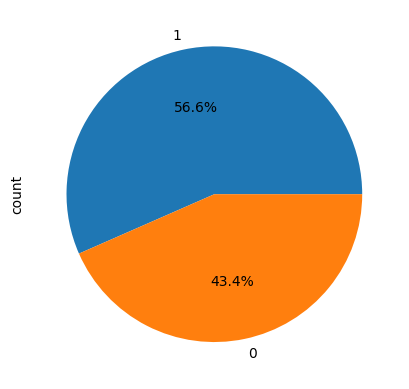

In [32]:
data['Accept(Y/N?)'].value_counts().plot(kind='pie',autopct='%1.1f%%')

We can see traget varibale has
- 56.6% of customers accept the cuopons,
- 43.4% of customers are not accepting the cuopons

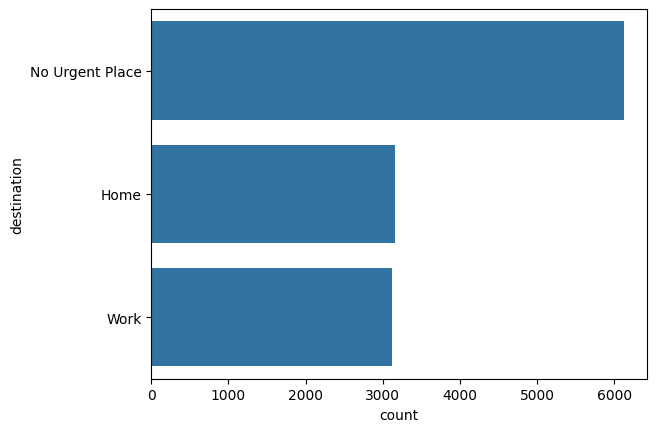

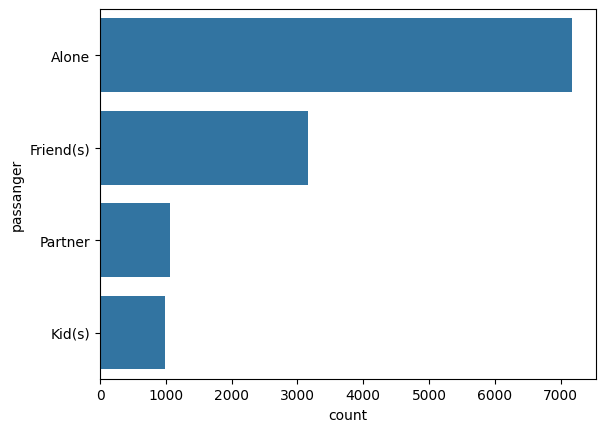

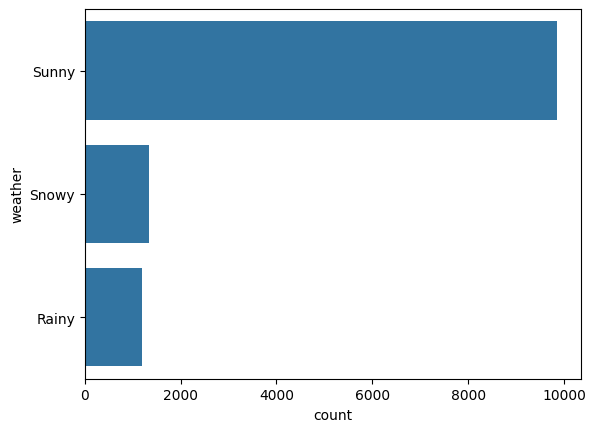

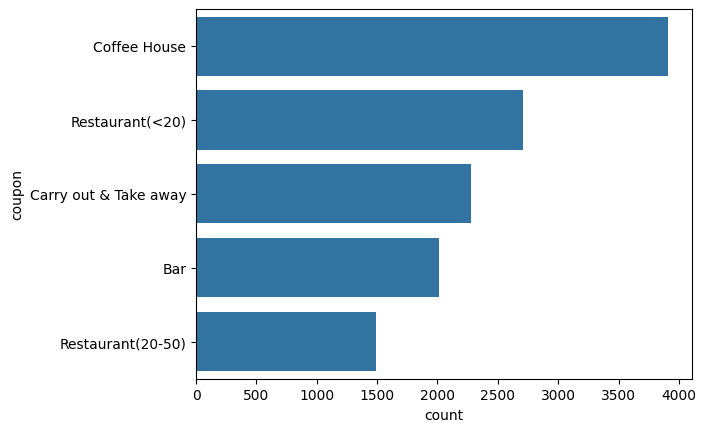

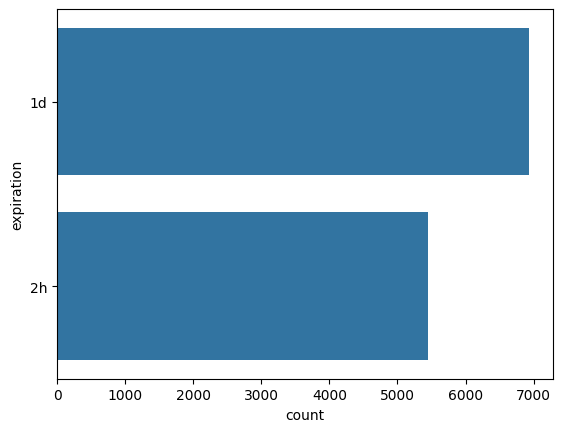

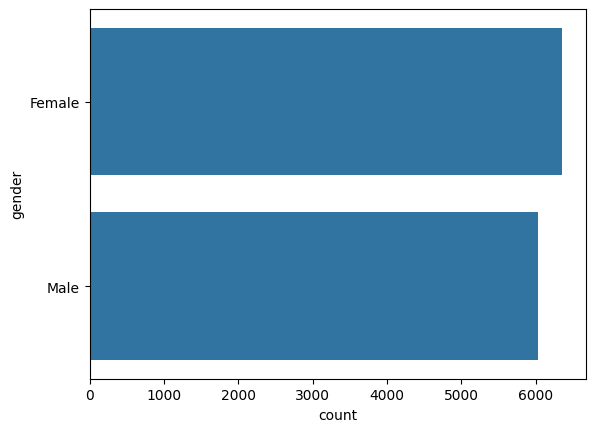

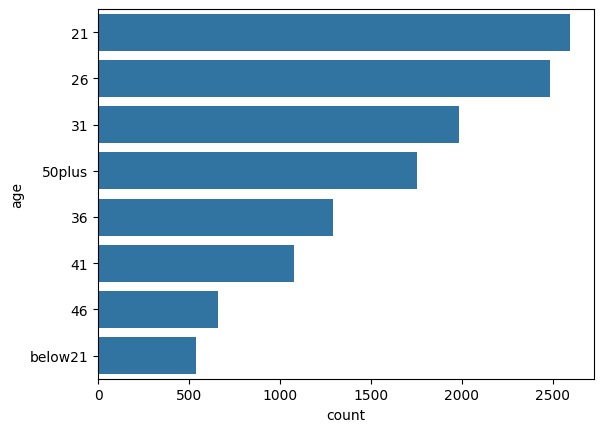

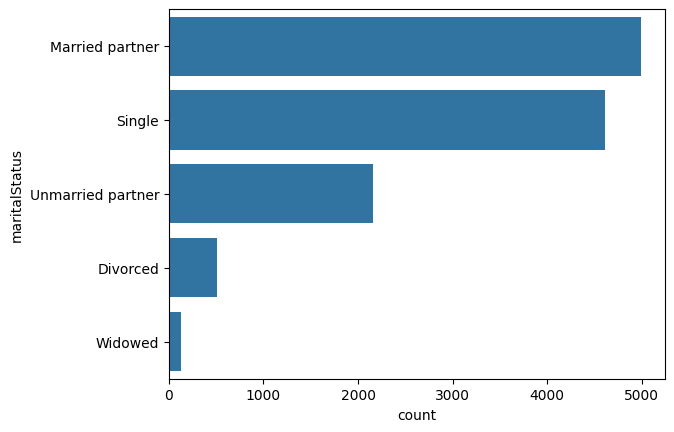

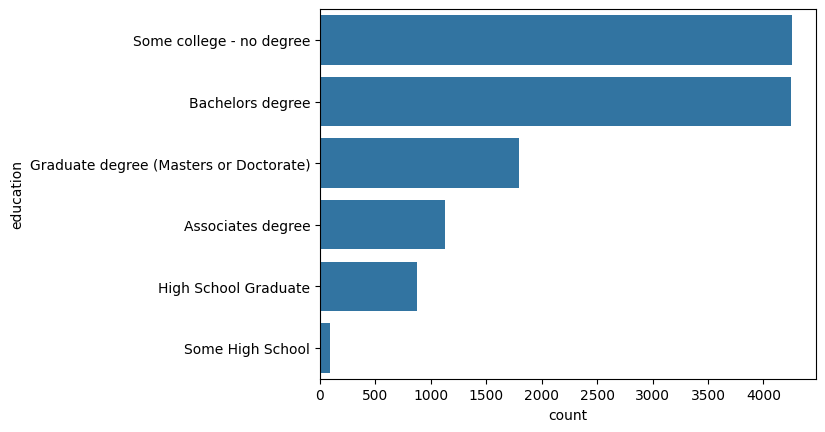

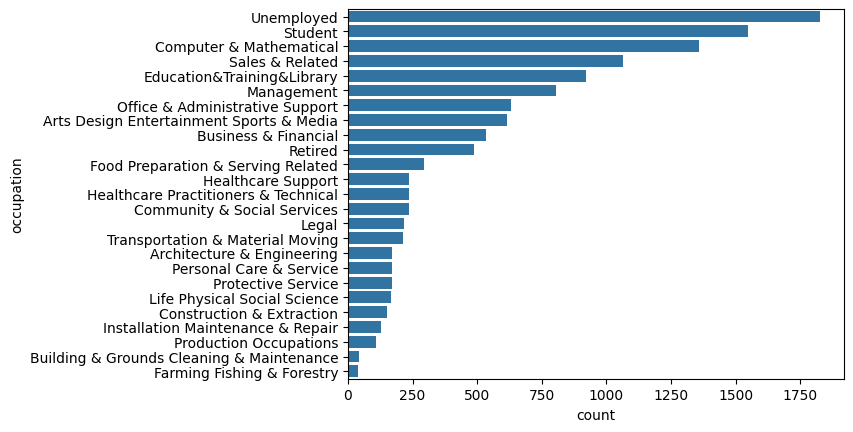

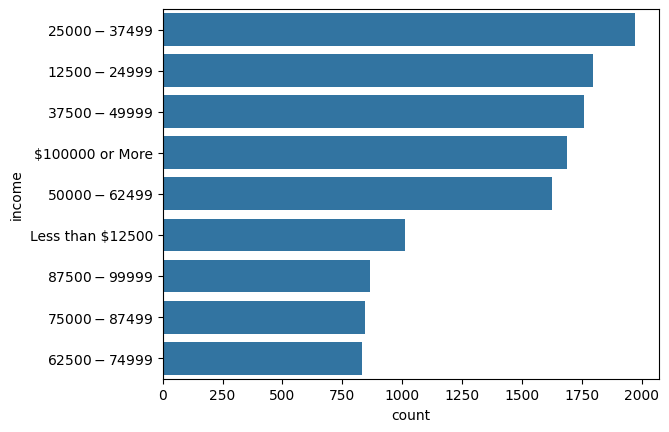

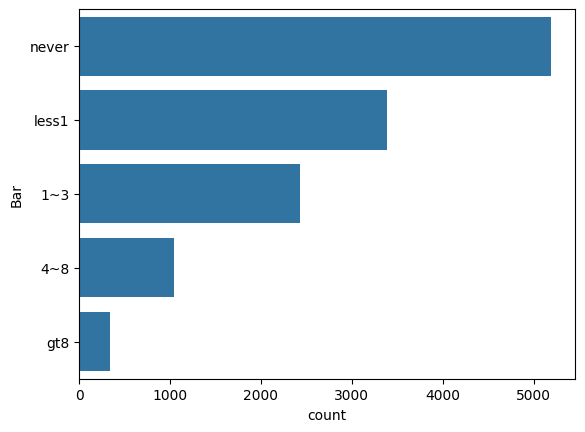

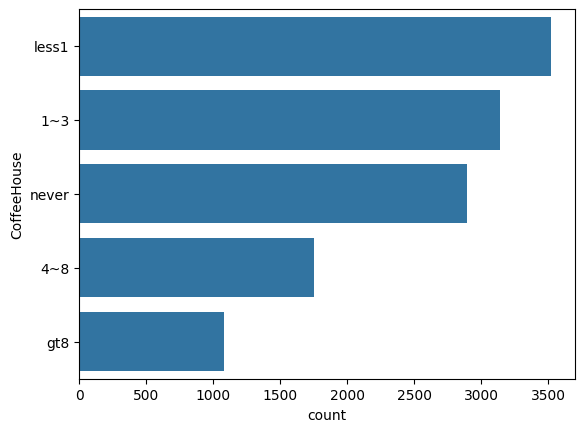

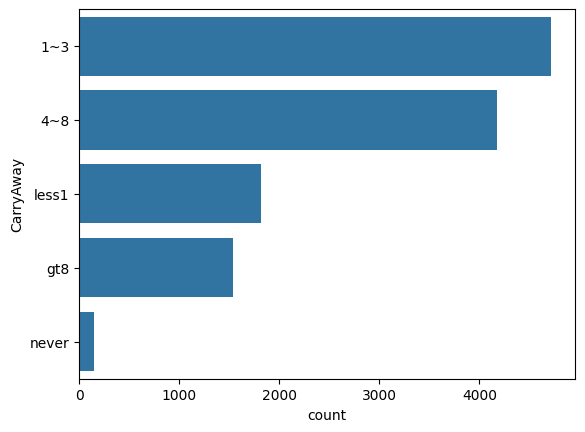

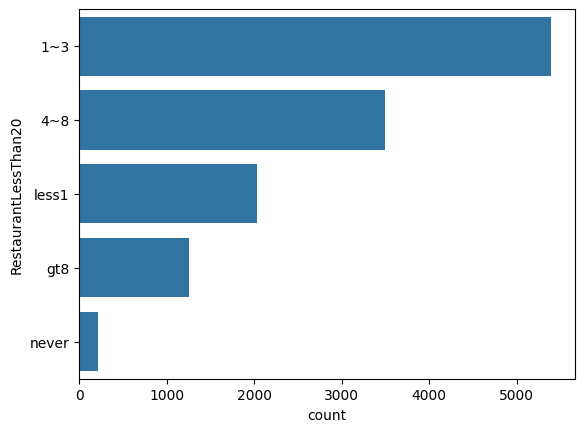

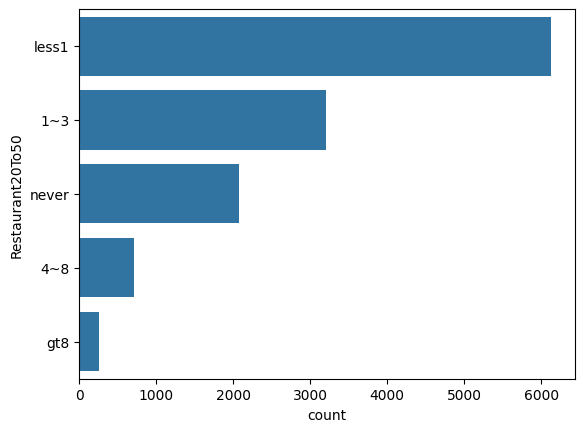

In [33]:
def countplots(col):
  sns.countplot(data[col],figsize=(10,40))
  plt.show()

for i,col in enumerate(list(data.select_dtypes(include='object').columns)[0:]):
  sns.countplot(y=col,data=data,order=data[col].value_counts().index)
  plt.show()

Observations:

- Most of the customers have no urgent place to travel
- Most of the passangers are travelling
- Most of the customers have no urgent place to travel
- Most of the passengers are travelling Alone
- Most of the customers travel on a sunny weather
- Most of the coupons are distributed from Coffeehouse and Restaurant with average spend of 20$



- Most of the coupons have expiration of 1d
- Most of the customer are Female passengers but not much difference with male
- Most of the customers belong to the age group 21-31
- Most of the customers are Married partner and single
- Most customers are maximum with no degree and completed their college and Bachelor's degree
- Most frequent customers with occupation unemployed
- Majority of customers income range are 25000 - 37499
- Most customers have never visited the bar
- Most customers have visited to coffeehouse less than 1 time in month
- Most customers takeaway food 1-3 times a month
- Most people have visited restaurant with average spend of 20$ are almost of 1-3 times


- Most people have visited restaurant with average spend of 20-30$ are almost less than 1 time


In [34]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

#Understanding cupon acceptance pattern for various features

Accept(Y/N?)        0     1
destination                
Home             1567  1594
No Urgent Place  2253  3865
Work             1561  1553


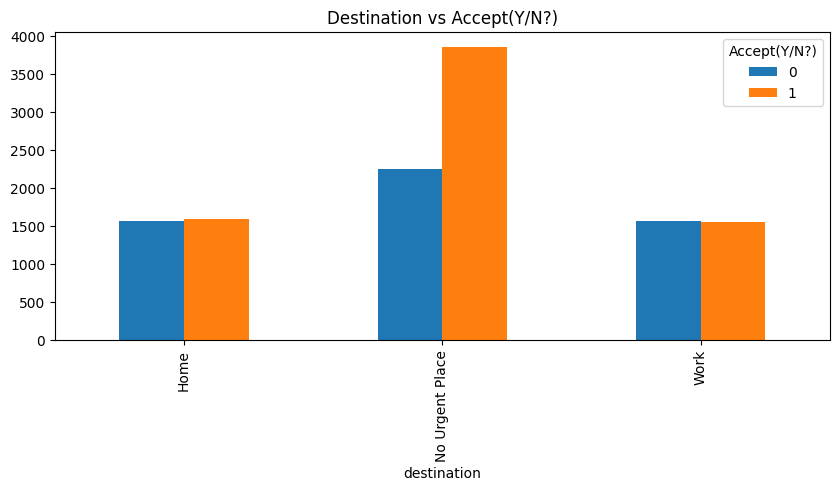

In [35]:

#Relation between destination vs Accept(Y/N?)
destination_wise= pd.crosstab(data['destination'],data['Accept(Y/N?)'])
print(destination_wise)
destination_wise.plot(kind='bar',figsize=(10,4))
plt.title('Destination vs Accept(Y/N?)')
plt.show()

- Most of the customers driving are not hurry and no urgent place to go

In [36]:
def group(col):
  table = pd.crosstab(data[col], data['Accept(Y/N?)'])
  accept_values = table.columns
  table['Total'] = table[accept_values[0]] + table[accept_values[1]]
  table['% Accepted'] = (table[accept_values[1]] / table['Total']) * 100
  table['% Rejected'] = (table[accept_values[0]] / table['Total']) * 100
  return table

In [37]:

group('destination')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
destination,,,,,
Home,1567,1594,3161,50.427080,49.572920
No Urgent Place,2253,3865,6118,63.174240,36.825760
Work,1561,1553,3114,49.871548,50.128452


We see that
- 3865 customers with 63% of acceptance rate who are travelling else where apart from Home and work have accepted coupons
- 1594 customers who are travelling to Home accepted coupons
- 1553 customers who area travelling to work accepted cupons

Accept(Y/N?)     0     1
passanger               
Alone         3418  3760
Friend(s)     1039  2127
Kid(s)         490   491
Partner        434   634


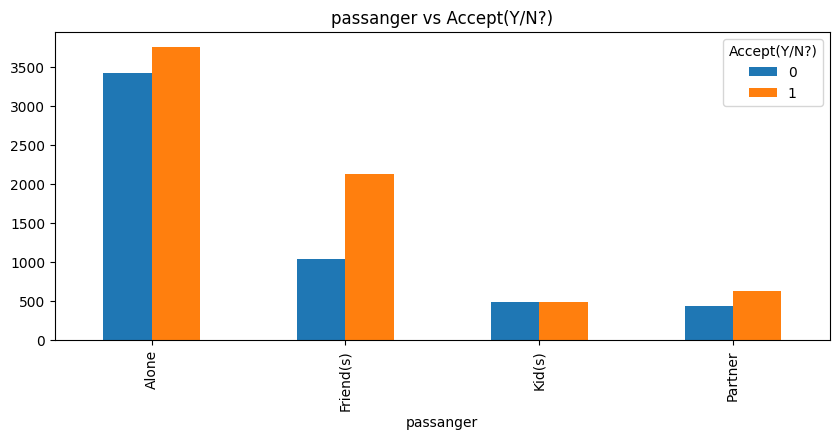

In [38]:
#Relation between passanger vs Accept(Y/N?)
passanger_wise= pd.crosstab(data['passanger'],data['Accept(Y/N?)'])
print(passanger_wise)
passanger_wise.plot(kind='bar',figsize=(10,4))
plt.title('passanger vs Accept(Y/N?)')
plt.show()

In [39]:
group('passanger')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
passanger,,,,,
Alone,3418,3760,7178,52.382279,47.617721
Friend(s),1039,2127,3166,67.182565,32.817435
Kid(s),490,491,981,50.050968,49.949032
Partner,434,634,1068,59.363296,40.636704


- Cupon acceptance rate is more with passangers are travelling alone

Accept(Y/N?)     0     1
age                     
21            1049  1549
26            1011  1475
31             905  1079
36             606   687
41             461   618
46             282   378
50plus         868   888
below21        199   338


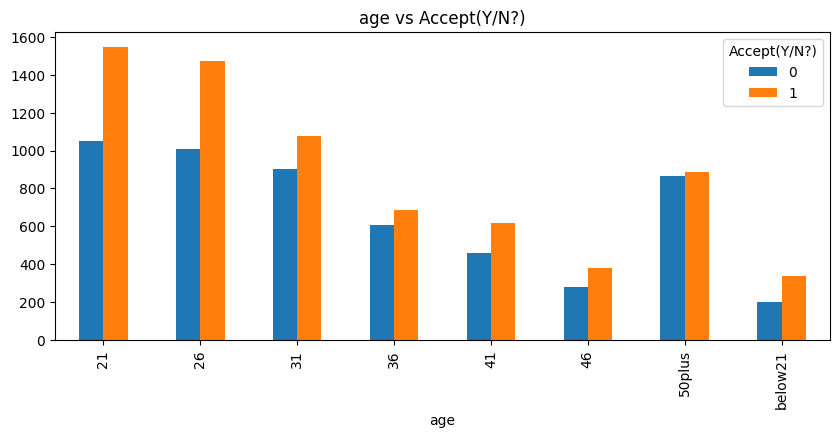

In [40]:
#Relation between age vs Accept(Y/N?)
age_wise= pd.crosstab(data['age'],data['Accept(Y/N?)'])
print(age_wise)
age_wise.plot(kind='bar',figsize=(10,4))
plt.title('age vs Accept(Y/N?)')
plt.show()

In [41]:
group('age')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
age,,,,,
21,1049,1549,2598,59.622787,40.377213
26,1011,1475,2486,59.332261,40.667739
31,905,1079,1984,54.385081,45.614919
36,606,687,1293,53.132251,46.867749
41,461,618,1079,57.275255,42.724745
46,282,378,660,57.272727,42.727273
50plus,868,888,1756,50.569476,49.430524
below21,199,338,537,62.942272,37.057728


Most of the customers are in age limit of 21-26 with 59% of acceptance rate, below 21 age have the acceptance rate of 63%

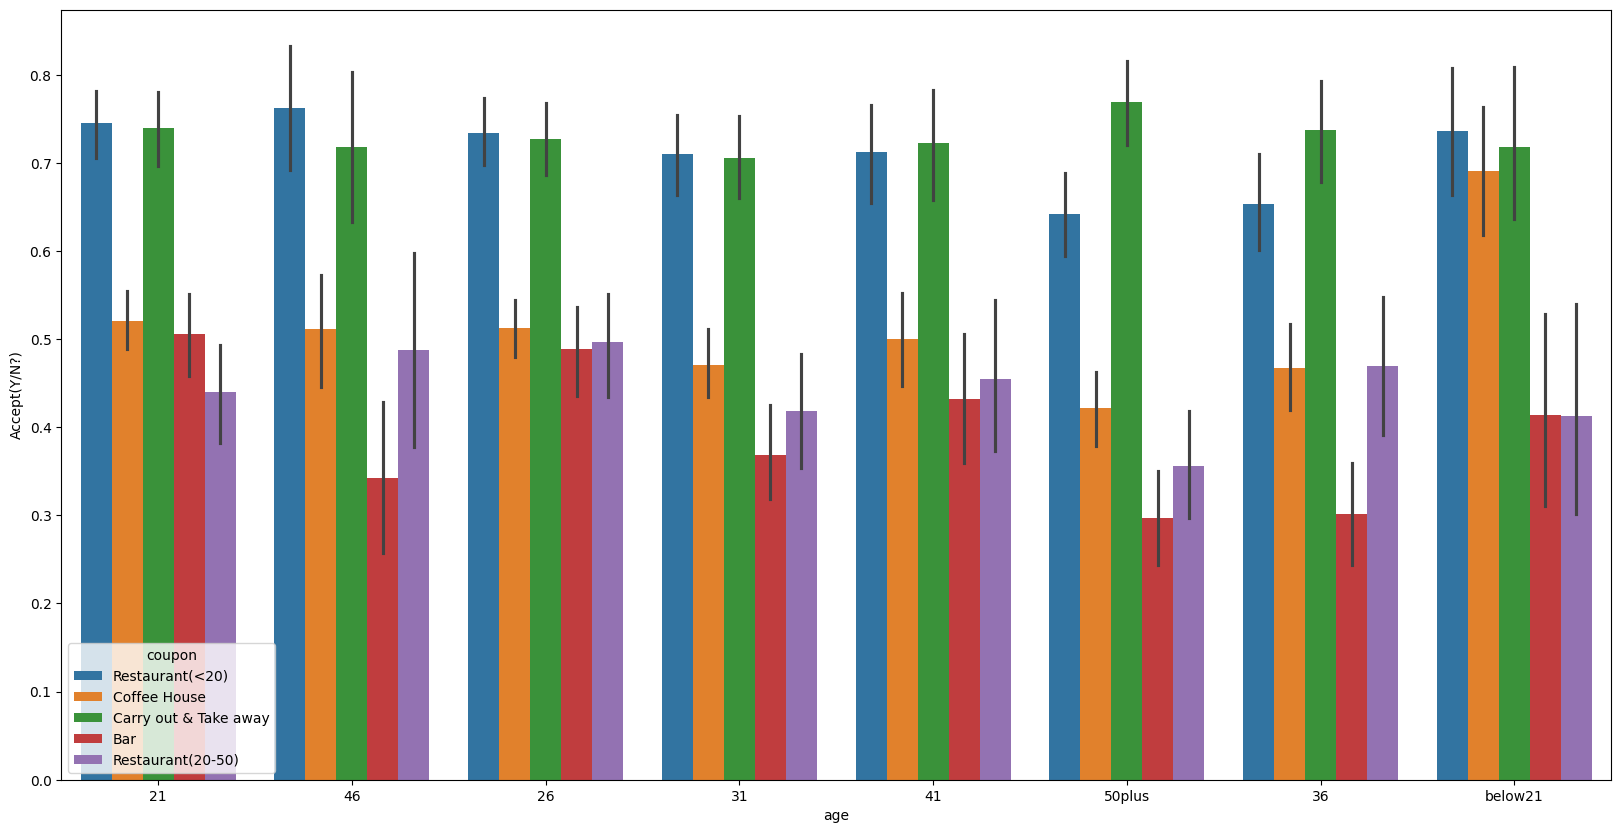

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- Almost all age group accept coupons of carryout and Takeaway and restaurant(<20)
- Coffehouse coupons are mostly accepted among age group below 21

Accept(Y/N?)     0     1
weather                 
Rainy          645   557
Snowy          724   605
Sunny         4012  5850


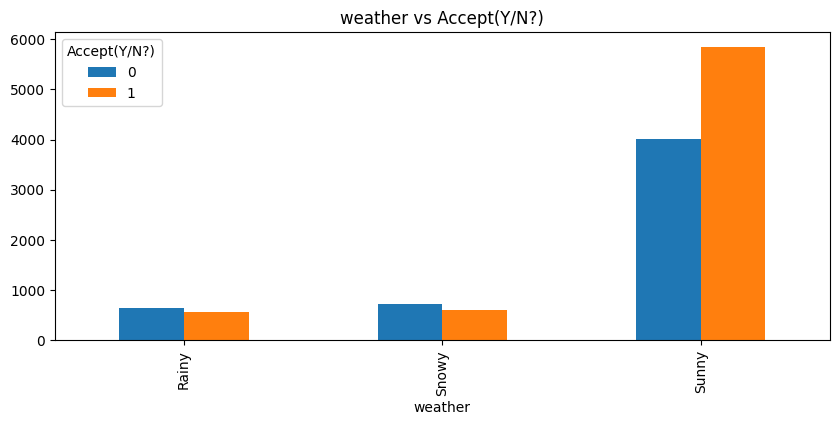

In [43]:
#Relation between weather vs Accept(Y/N?)
weather_wise= pd.crosstab(data['weather'],data['Accept(Y/N?)'])
print(weather_wise)
weather_wise.plot(kind='bar',figsize=(10,4))
plt.title('weather vs Accept(Y/N?)')
plt.show()

In [44]:

group('weather')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
weather,,,,,
Rainy,645,557,1202,46.339434,53.660566
Snowy,724,605,1329,45.522950,54.477050
Sunny,4012,5850,9862,59.318597,40.681403


- Maximum number of customers are in sunny weather when compared to  with 59% of acceptance rate

Accept(Y/N?)     0     1
temperature             
30            1066  1171
55            1773  2055
80            2542  3786


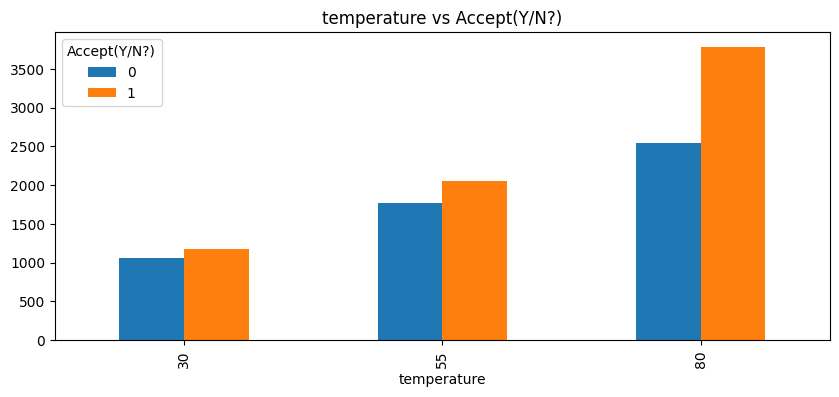

In [45]:
#Relation between temperature vs Accept(Y/N?)
temperature_wise= pd.crosstab(data['temperature'],data['Accept(Y/N?)'])
print(temperature_wise)
temperature_wise.plot(kind='bar',figsize=(10,4))
plt.title('temperature vs Accept(Y/N?)')
plt.show()

In [46]:
group('temperature')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
temperature,,,,,
30,1066,1171,2237,52.346893,47.653107
55,1773,2055,3828,53.683386,46.316614
80,2542,3786,6328,59.829330,40.170670


- Most of the customers travel in 80F in normal weater condition their acceptance rate in high 59% compared to 55F and 30F which is cold

Accept(Y/N?)              0     1
coupon                           
Bar                    1186   824
Carry out & Take away   610  1665
Coffee House           1970  1943
Restaurant(20-50)       831   656
Restaurant(<20)         784  1924


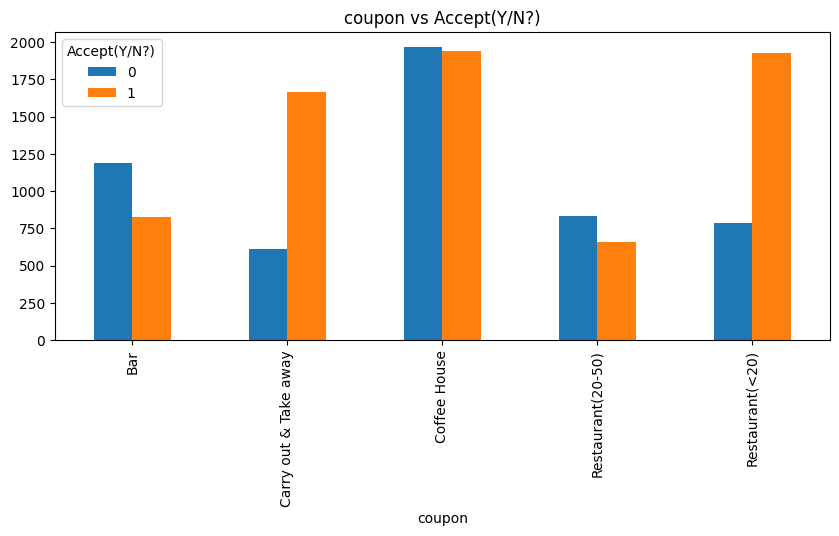

In [47]:
#Relation between coupon vs Accept(Y/N?)
coupon_wise= pd.crosstab(data['coupon'],data['Accept(Y/N?)'])
print(coupon_wise)
coupon_wise.plot(kind='bar',figsize=(10,4))
plt.title('coupon vs Accept(Y/N?)')
plt.show()

In [48]:
group('coupon')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
coupon,,,,,
Bar,1186,824,2010,40.995025,59.004975
Carry out & Take away,610,1665,2275,73.186813,26.813187
Coffee House,1970,1943,3913,49.654996,50.345004
Restaurant(20-50),831,656,1487,44.115669,55.884331
Restaurant(<20),784,1924,2708,71.048744,28.951256


- Most of the customers accepted the coupons from carryout and Takeaway with 73% and second most 71% acceptance rate with restaurant(<20) but most coupons are given are coffee House and Restaurant(<20)

Accept(Y/N?)     0     1
gender                  
Female        2895  3460
Male          2486  3552


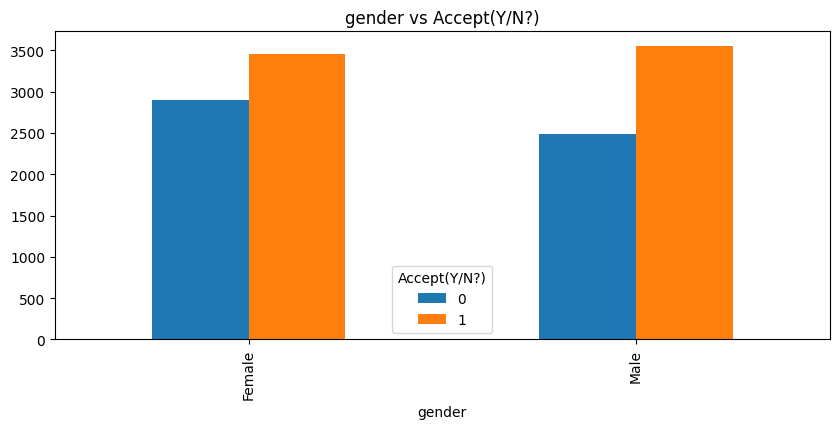

In [49]:
#Relation between gender vs Accept(Y/N?)
gender_wise= pd.crosstab(data['gender'],data['Accept(Y/N?)'])
print(gender_wise)
gender_wise.plot(kind='bar',figsize=(10,4))
plt.title('gender vs Accept(Y/N?)')
plt.show()

In [50]:
group('gender')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
gender,,,,,
Female,2895,3460,6355,54.445319,45.554681
Male,2486,3552,6038,58.827426,41.172574


- Most of the customers who accepted the coupons are female but not much differnece with male

Accept(Y/N?)     0     1
expiration              
1d            2621  4317
2h            2760  2695


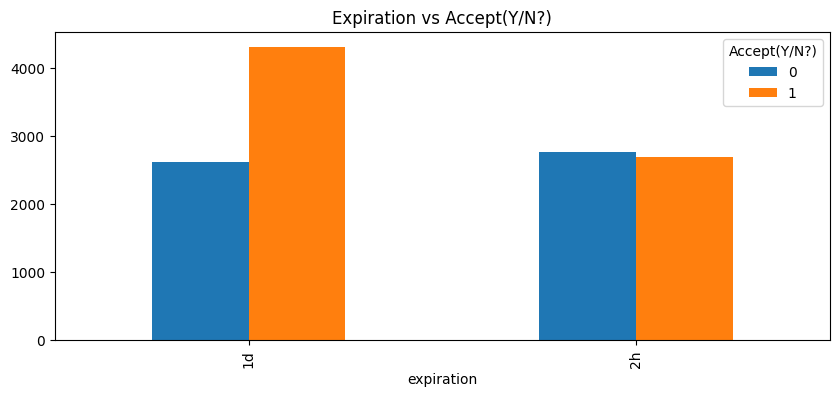

In [51]:
#Relation between expiration vs Accept(Y/N?)
gender_wise= pd.crosstab(data['expiration'],data['Accept(Y/N?)'])
print(gender_wise)
gender_wise.plot(kind='bar',figsize=(10,4))
plt.title('Expiration vs Accept(Y/N?)')
plt.show()

In [52]:
group('expiration')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
expiration,,,,,
1d,2621,4317,6938,62.222543,37.777457
2h,2760,2695,5455,49.404216,50.595784


- Coupons that are having expiration in a single day are given more frequent and also accepted by most customers(62%)

Accept(Y/N?)          0     1
maritalStatus                
Divorced            239   266
Married partner    2297  2697
Single             1826  2784
Unmarried partner   952  1203
Widowed              67    62


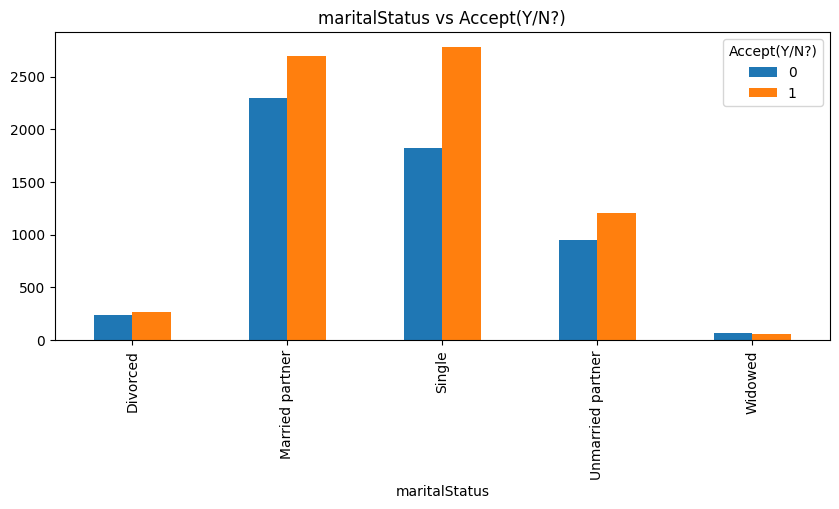

In [53]:
#Relation between maritalStatus vs Accept(Y/N?)
maritalStatus_wise= pd.crosstab(data['maritalStatus'],data['Accept(Y/N?)'])
print(maritalStatus_wise)
maritalStatus_wise.plot(kind='bar',figsize=(10,4))
plt.title('maritalStatus vs Accept(Y/N?)')
plt.show()

In [54]:
group('maritalStatus')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
maritalStatus,,,,,
Divorced,239,266,505,52.673267,47.326733
Married partner,2297,2697,4994,54.004806,45.995194
Single,1826,2784,4610,60.390456,39.609544
Unmarried partner,952,1203,2155,55.823666,44.176334
Widowed,67,62,129,48.062016,51.937984


- Coupon acceptance is highest customers are single with 60% and also Married partners

Accept(Y/N?)     0     1
has_children            
0             3009  4234
1             2372  2778


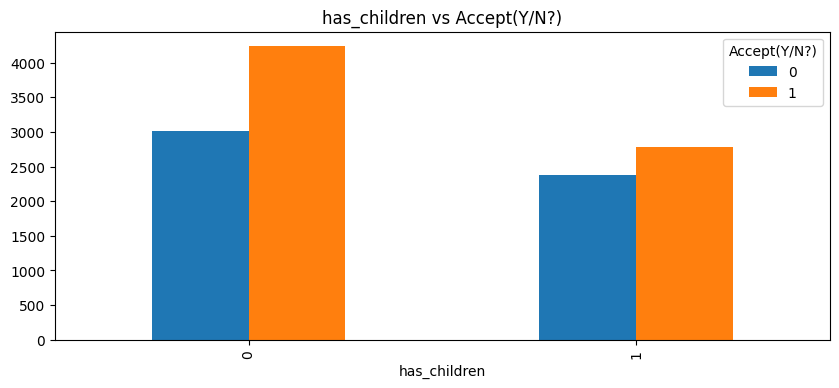

In [55]:
#Relation between has_children vs Accept(Y/N?)
children_wise= pd.crosstab(data['has_children'],data['Accept(Y/N?)'])
print(children_wise)
children_wise.plot(kind='bar',figsize=(10,4))
plt.title('has_children vs Accept(Y/N?)')
plt.show()

In [56]:
group('has_children')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
has_children,,,,,
0,3009,4234,7243,58.456441,41.543559
1,2372,2778,5150,53.941748,46.058252


- There is no much difference in acceptance rate of passanger with and without children

Accept(Y/N?)                               0     1
education                                         
Associates degree                        512   614
Bachelors degree                        1903  2344
Graduate degree (Masters or Doctorate)   854   939
High School Graduate                     361   519
Some High School                          25    62
Some college - no degree                1726  2534


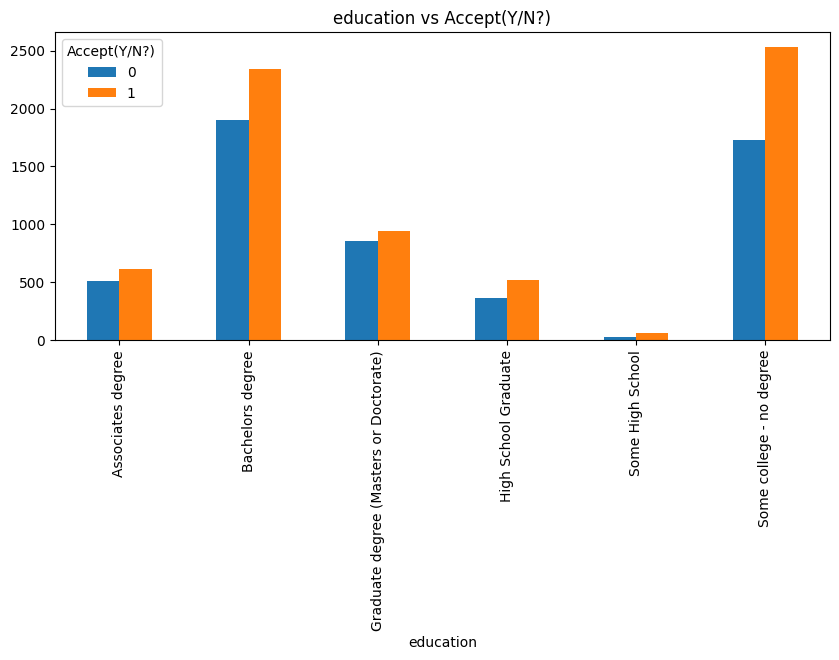

In [57]:
#Relation between education vs Accept(Y/N?)
education_wise= pd.crosstab(data['education'],data['Accept(Y/N?)'])
print(education_wise)
education_wise.plot(kind='bar',figsize=(10,4))
plt.title('education vs Accept(Y/N?)')
plt.show()

In [58]:
group('education')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
education,,,,,
Associates degree,512,614,1126,54.529307,45.470693
Bachelors degree,1903,2344,4247,55.191900,44.808100
Graduate degree (Masters or Doctorate),854,939,1793,52.370329,47.629671
High School Graduate,361,519,880,58.977273,41.022727
Some High School,25,62,87,71.264368,28.735632
Some college - no degree,1726,2534,4260,59.483568,40.516432


- Highest acceptance rate of 71% is for high school and all other education degree acceptance rate is similar

Accept(Y/N?)                                 0    1
occupation                                         
Architecture & Engineering                  62  110
Arts Design Entertainment Sports & Media   298  319
Building & Grounds Cleaning & Maintenance   18   24
Business & Financial                       231  305
Community & Social Services                121  115
Computer & Mathematical                    592  768
Construction & Extraction                   47  103
Education&Training&Library                 444  477
Farming Fishing & Forestry                  20   21
Food Preparation & Serving Related         123  170
Healthcare Practitioners & Technical        79  158
Healthcare Support                          71  166
Installation Maintenance & Repair           60   69
Legal                                      115  103
Life Physical Social Science                71   97
Management                                 332  474
Office & Administrative Support            254  377
Personal Car

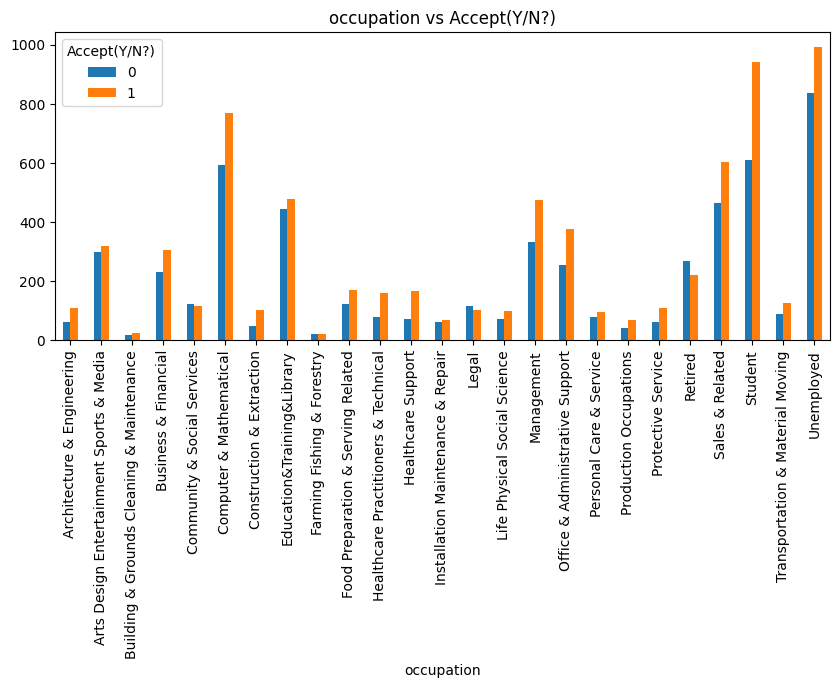

In [59]:
#Relation between occupation vs Accept(Y/N?)
occupation_wise= pd.crosstab(data['occupation'],data['Accept(Y/N?)'])
print(occupation_wise)
occupation_wise.plot(kind='bar',figsize=(10,4))
plt.title('occupation vs Accept(Y/N?)')
plt.show()

In [60]:
group('occupation')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
occupation,,,,,
Architecture & Engineering,62,110,172,63.953488,36.046512
Arts Design Entertainment Sports & Media,298,319,617,51.701783,48.298217
Building & Grounds Cleaning & Maintenance,18,24,42,57.142857,42.857143
Business & Financial,231,305,536,56.902985,43.097015
Community & Social Services,121,115,236,48.728814,51.271186
Computer & Mathematical,592,768,1360,56.470588,43.529412
Construction & Extraction,47,103,150,68.666667,31.333333
Education&Training&Library,444,477,921,51.791531,48.208469
Farming Fishing & Forestry,20,21,41,51.219512,48.780488


- Coupon acceptance rate of 70% which is highest for the customers from Healtcare sector,most no of coupons have by unemployed   

Accept(Y/N?)        0     1
income                     
$100000 or More   714   974
$12500 - $24999   766  1029
$25000 - $37499   807  1165
$37500 - $49999   773   987
$50000 - $62499   660   964
$62500 - $74999   395   437
$75000 - $87499   437   407
$87500 - $99999   409   456
Less than $12500  420   593


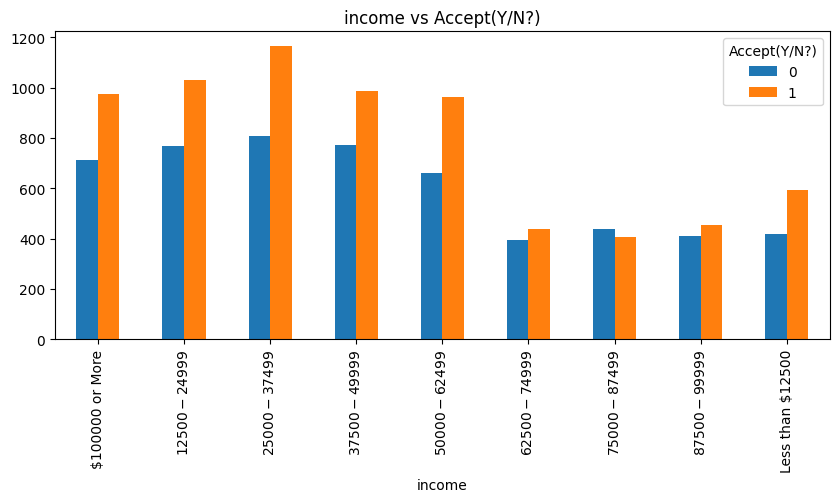

In [61]:
#Relation between income vs Accept(Y/N?)
income_wise= pd.crosstab(data['income'],data['Accept(Y/N?)'])
print(income_wise)
income_wise.plot(kind='bar',figsize=(10,4))
plt.title('income vs Accept(Y/N?)')
plt.show()

In [62]:
group('income')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
income,,,,,
$100000 or More,714,974,1688,57.701422,42.298578
$12500 - $24999,766,1029,1795,57.325905,42.674095
$25000 - $37499,807,1165,1972,59.077079,40.922921
$37500 - $49999,773,987,1760,56.079545,43.920455
$50000 - $62499,660,964,1624,59.359606,40.640394
$62500 - $74999,395,437,832,52.524038,47.475962
$75000 - $87499,437,407,844,48.222749,51.777251
$87500 - $99999,409,456,865,52.716763,47.283237
Less than $12500,420,593,1013,58.538993,41.461007


- Customers with the salary range of $25000-$37499 have most accepted rate of 59%
- Income beyond 62500 have similar accept and rejection rates on coupon

Accept(Y/N?)     0     1
Bar                     
1~3            924  1508
4~8            384   661
gt8            142   196
less1         1481  1902
never         2450  2745


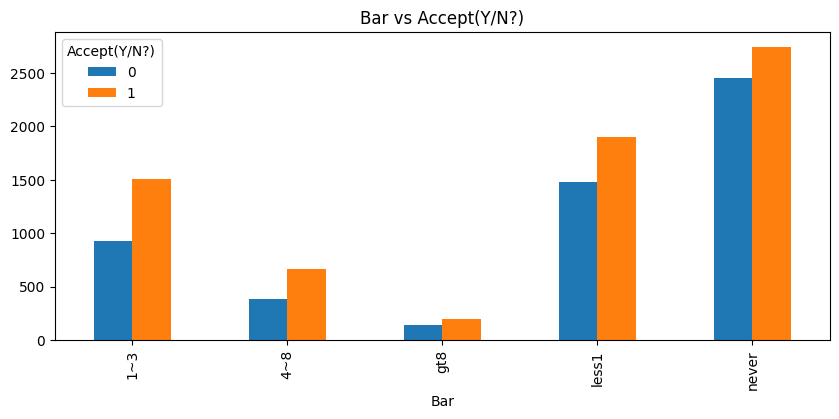

In [63]:

#Relation between Bar vs Accept(Y/N?)
Bar_wise= pd.crosstab(data['Bar'],data['Accept(Y/N?)'])
print(Bar_wise)
Bar_wise.plot(kind='bar',figsize=(10,4))
plt.title('Bar vs Accept(Y/N?)')
plt.show()

In [64]:
group('Bar')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
Bar,,,,,
1~3,924,1508,2432,62.006579,37.993421
4~8,384,661,1045,63.253589,36.746411
gt8,142,196,338,57.988166,42.011834
less1,1481,1902,3383,56.222288,43.777712
never,2450,2745,5195,52.839269,47.160731


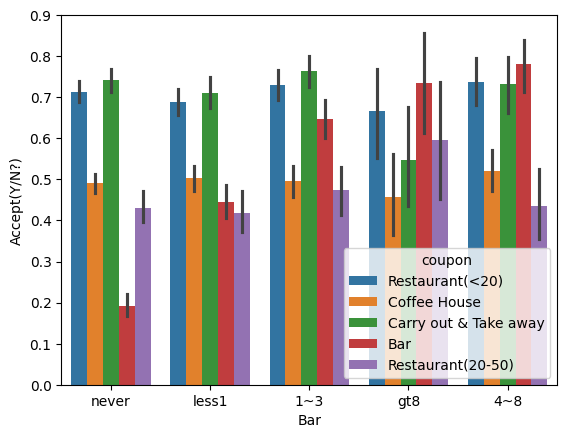

In [65]:
sns.barplot(x='Bar',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- customers who go 4-8 times and more 8 times are accepting more coupons from bar
- Customers never recive coupons from bar receive from carryout and restaurant<20

Accept(Y/N?)     0     1
CoffeeHouse             
1~3           1094  2044
4~8            645  1107
gt8            452   631
less1         1614  1911
never         1576  1319


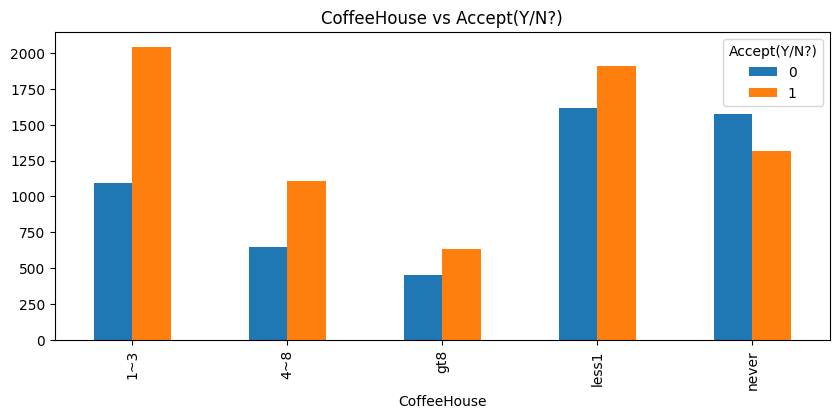

In [66]:
#Relation between CoffeeHouse vs Accept(Y/N?)
Bar_wise= pd.crosstab(data['CoffeeHouse'],data['Accept(Y/N?)'])
print(Bar_wise)
Bar_wise.plot(kind='bar',figsize=(10,4))
plt.title('CoffeeHouse vs Accept(Y/N?)')
plt.show()

In [67]:
group('CoffeeHouse')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
CoffeeHouse,,,,,
1~3,1094,2044,3138,65.137030,34.862970
4~8,645,1107,1752,63.184932,36.815068
gt8,452,631,1083,58.264081,41.735919
less1,1614,1911,3525,54.212766,45.787234
never,1576,1319,2895,45.561313,54.438687


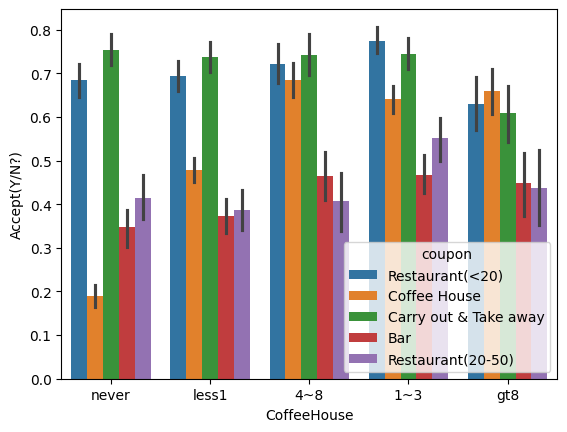

In [68]:
sns.barplot(x='CoffeeHouse',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- customers who visited 4-8 times or greater tha 8 times have more coupons of coffeeHouse
- Most customers accept carryout and takeaway coupons than any other

Accept(Y/N?)     0     1
CarryAway               
1~3           1976  2743
4~8           1762  2409
gt8            659   876
less1          913   906
never           71    78


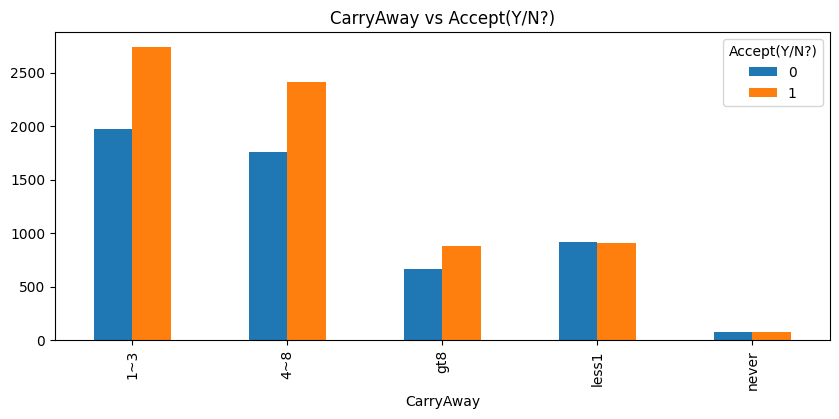

In [69]:
#Relation between CarryAway vs Accept(Y/N?)
Bar_wise= pd.crosstab(data['CarryAway'],data['Accept(Y/N?)'])
print(Bar_wise)
Bar_wise.plot(kind='bar',figsize=(10,4))
plt.title('CarryAway vs Accept(Y/N?)')
plt.show()

In [70]:
group('CarryAway')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
CarryAway,,,,,
1~3,1976,2743,4719,58.126722,41.873278
4~8,1762,2409,4171,57.755934,42.244066
gt8,659,876,1535,57.068404,42.931596
less1,913,906,1819,49.807587,50.192413
never,71,78,149,52.348993,47.651007


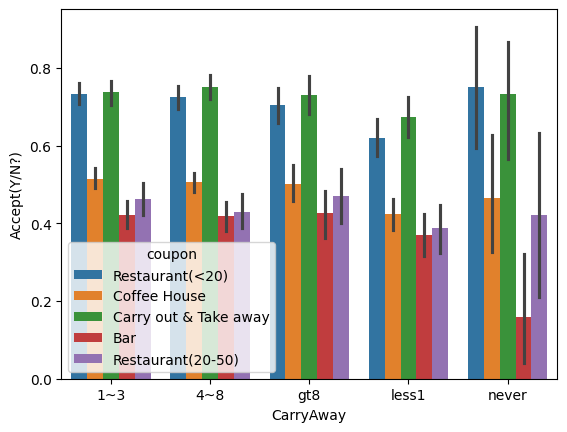

In [71]:
sns.barplot(x='CarryAway',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- Most customers prefer carryaway and restaurants type coupons
- customers never took carryaway have the highest acceptance of takeaway and restaurant


Accept(Y/N?)             0     1
RestaurantLessThan20            
1~3                   2373  3024
4~8                   1461  2032
gt8                    494   759
less1                  952  1082
never                  101   115


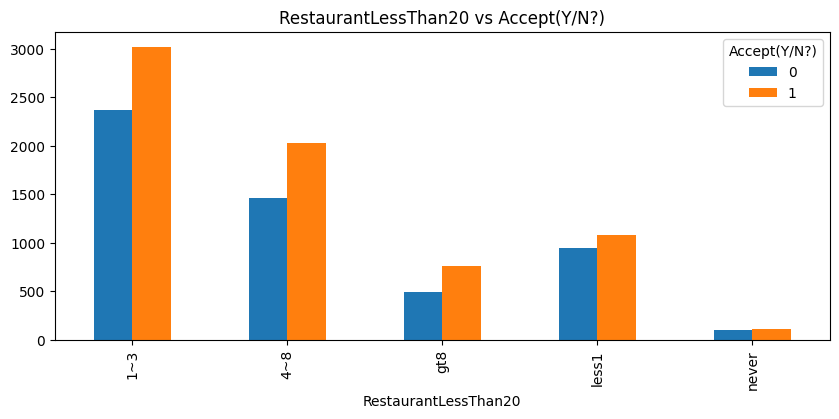

In [72]:
#Relation between RestaurantLessThan20 vs Accept(Y/N?)
Bar_wise= pd.crosstab(data['RestaurantLessThan20'],data['Accept(Y/N?)'])
print(Bar_wise)
Bar_wise.plot(kind='bar',figsize=(10,4))
plt.title('RestaurantLessThan20 vs Accept(Y/N?)')
plt.show()

In [73]:
group('RestaurantLessThan20')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
RestaurantLessThan20,,,,,
1~3,2373,3024,5397,56.031128,43.968872
4~8,1461,2032,3493,58.173490,41.826510
gt8,494,759,1253,60.574621,39.425379
less1,952,1082,2034,53.195674,46.804326
never,101,115,216,53.240741,46.759259


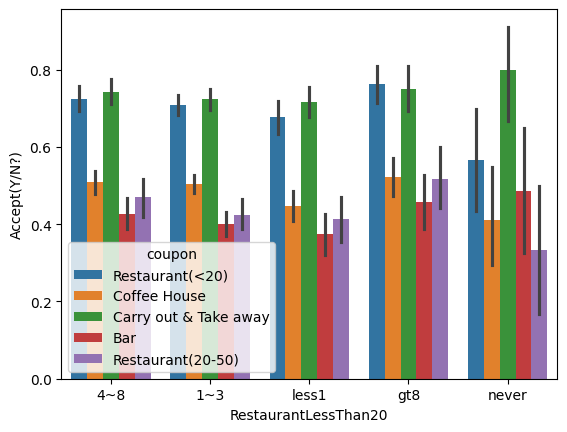

In [74]:
sns.barplot(x='RestaurantLessThan20',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- Customers who visited more than 8 times receive more coupons reastaurant<20
- But most cutsomers visited restaurant at least 1-3 times spends 20$ average
- People nevere visted restuarant have higher acceptance for carryout and takeaway

Accept(Y/N?)         0     1
Restaurant20To50            
1~3               1309  1895
4~8                248   470
gt8                 84   170
less1             2727  3407
never             1013  1070


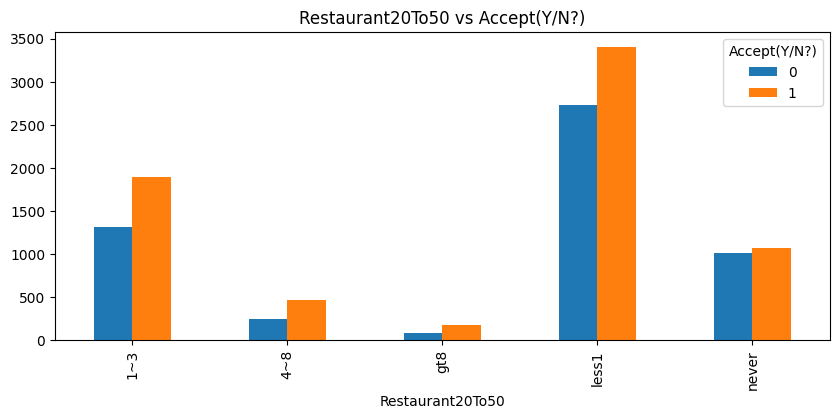

In [75]:
#Relation between Restaurant20To50 vs Accept(Y/N?)
Bar_wise= pd.crosstab(data['Restaurant20To50'],data['Accept(Y/N?)'])
print(Bar_wise)
Bar_wise.plot(kind='bar',figsize=(10,4))
plt.title('Restaurant20To50 vs Accept(Y/N?)')
plt.show()

In [76]:
group('Restaurant20To50')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
Restaurant20To50,,,,,
1~3,1309,1895,3204,59.144819,40.855181
4~8,248,470,718,65.459610,34.540390
gt8,84,170,254,66.929134,33.070866
less1,2727,3407,6134,55.542876,44.457124
never,1013,1070,2083,51.368219,48.631781


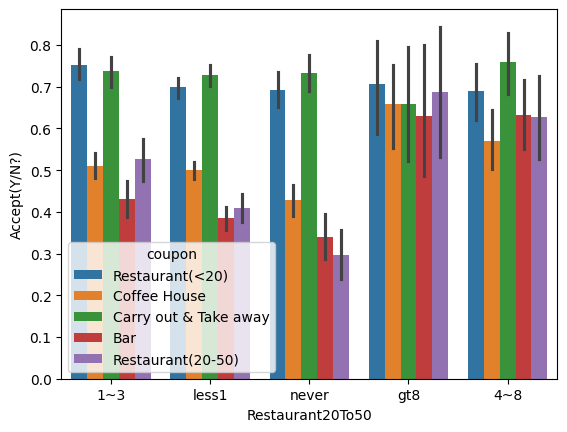

In [77]:
sns.barplot(x='Restaurant20To50',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- Customers visited less than 1 times where average spend on restaurant in between 20$-50$
-Higher acceptance rate from customers who visited reastaurant more tha 8 times
- Never visited expensive reataurant have less acceptance of the coupon
- all customers mostly accept cupons at carry out and Takeaway

In [78]:
data['toCoupon_GEQ5min'].value_counts()

,count
toCoupon_GEQ5min,
1,12393


In [79]:
data['toCoupon_GEQ15min'].value_counts()

,count
toCoupon_GEQ15min,
1,6985
0,5408


In [80]:
data['toCoupon_GEQ25min'].value_counts()

,count
toCoupon_GEQ25min,
0,10930
1,1463


- All the data points frives are more then 5 min, we shall categorise drive based on drive time

In [81]:
drive_time= []

for i in data.index:
    if (data['toCoupon_GEQ15min'][i]) == 0:
        drive_time.append('less than 15 mins')
    elif ((data['toCoupon_GEQ15min'][i]) == 1) and ((data['toCoupon_GEQ25min'][i]) == 0):
        drive_time.append('15 to 25 mins')
    else:
        drive_time.append('more than 25 mins')

In [82]:
data['drive_time'] = drive_time

In [83]:
data['drive_time'].value_counts()

,count
drive_time,
15 to 25 mins,5522
less than 15 mins,5408
more than 25 mins,1463


Accept(Y/N?)          0     1
drive_time                   
15 to 25 mins      2446  3076
less than 15 mins  2086  3322
more than 25 mins   849   614


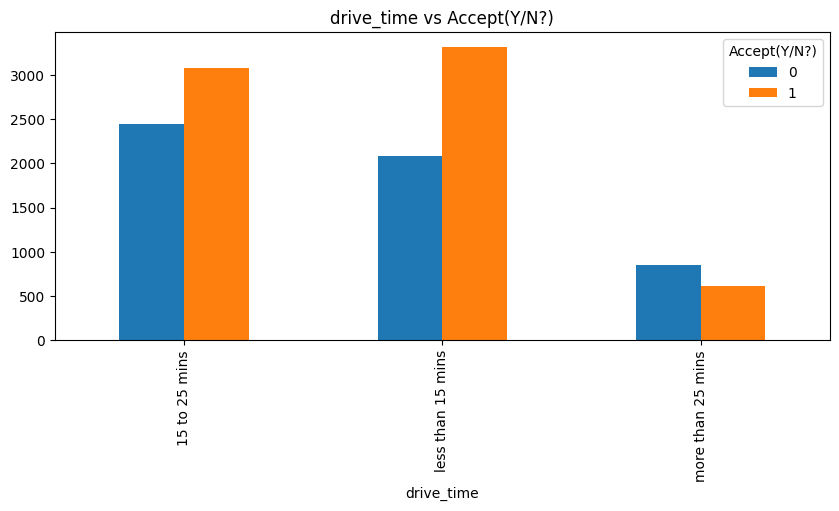

In [84]:
#Relation between drive_time vs Accept(Y/N?)
drive_time= pd.crosstab(data['drive_time'],data['Accept(Y/N?)'])
print(drive_time)
drive_time.plot(kind='bar',figsize=(10,4))
plt.title('drive_time vs Accept(Y/N?)')
plt.show()

In [85]:
group('drive_time')

Accept(Y/N?),0,1,Total,% Accepted,% Rejected
drive_time,,,,,
15 to 25 mins,2446,3076,5522,55.704455,44.295545
less than 15 mins,2086,3322,5408,61.427515,38.572485
more than 25 mins,849,614,1463,41.968558,58.031442


- Most ofthe coupons issued with driving distance less than 15 mins and acceptance rate is also more with 61%

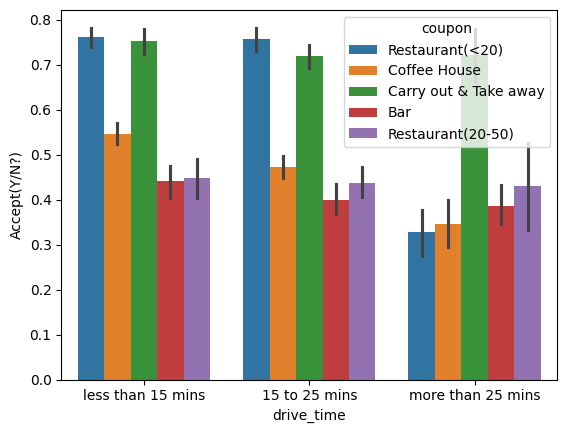

In [86]:
sns.barplot(x='drive_time',y='Accept(Y/N?)',data=data,hue='coupon')
plt.show()

- Most coupon type within 15mins drive are restaurant type

In [87]:
data.shape

(12393, 25)

In [88]:
#We can drop toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min feature
#since we have drive_time

data.drop(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],axis=1,inplace=True)

In [89]:
data.shape

(12393, 22)

In [90]:
data_1 = data.select_dtypes(include='int')

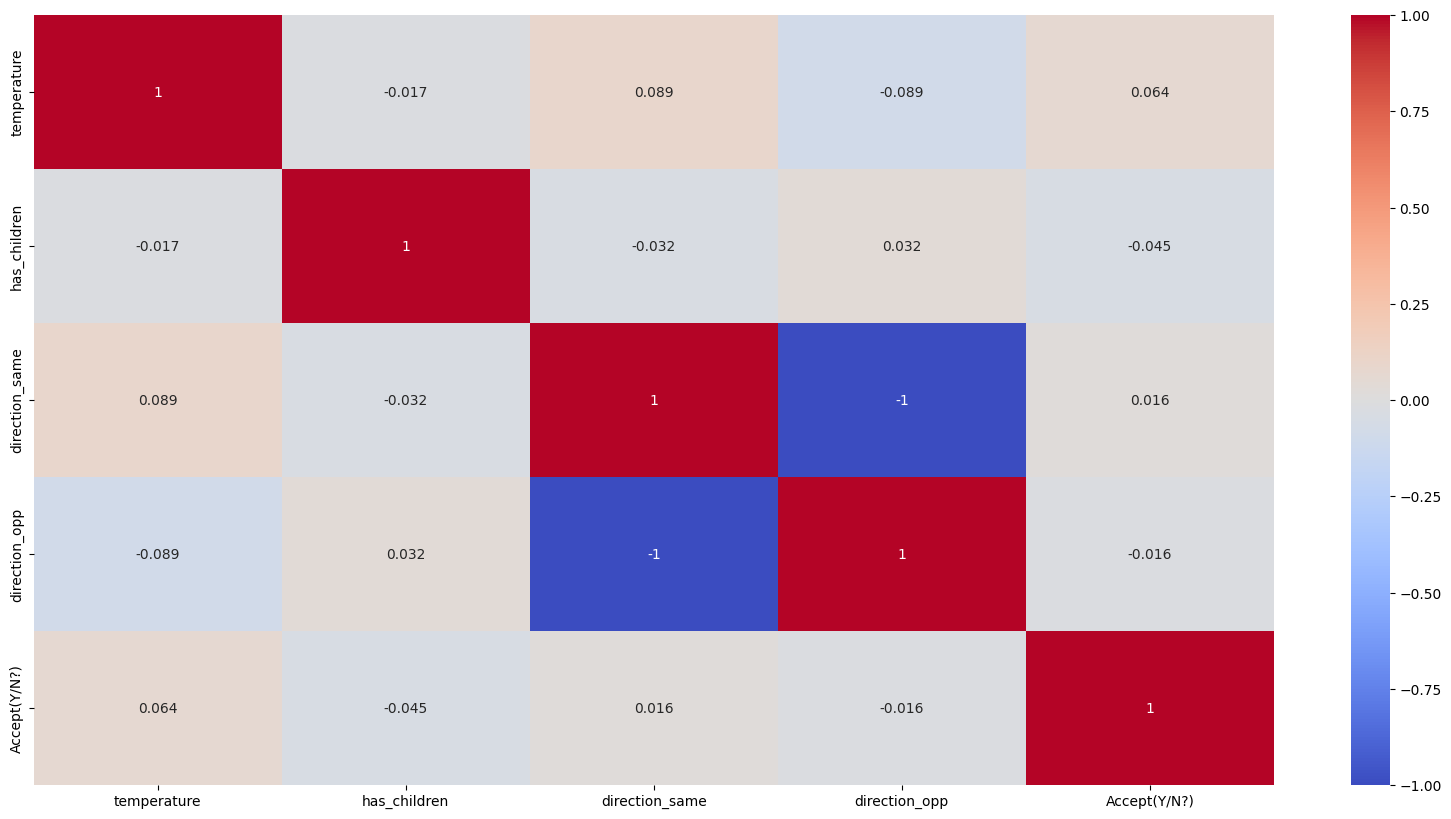

In [91]:
#Correlation Map for Integer Columns
plt.figure(figsize=(20,10))
sns.heatmap(data_1.corr(),annot=True,cmap='coolwarm')
plt.show()

- Since the coreelation values of direction_same and direction_opp is neagative with -1,we can drop those columns

In [92]:
data.drop(['direction_same','direction_opp'],axis=1,inplace=True)

In [93]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'Accept(Y/N?)',
       'drive_time'],
      dtype='object')

#Label Encoding for each Object datatype

In [94]:
for col in data.select_dtypes(include='object').columns:
    print(col,':',data[col].unique())

destination : ['No Urgent Place' 'Home' 'Work']
passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather : ['Sunny' 'Rainy' 'Snowy']
coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration : ['1d' '2h']
gender : ['Female' 'Male']
age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction

In [95]:
#Converting all categorical fetaures to numerical features we use LabelEncoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1=data.copy(deep=True)

text_data_features ={ i for i in list(data.columns) if i not in list(data.describe().columns)}

print('Label Encoder Tranformation')

for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i,':',df1[i].unique(),'=',le.inverse_transform(df1[i].unique()))

Label Encoder Tranformation
occupation : [24  0 22  7 11 10 21 15  1  5 14 17  4 16  6 13 20 12 23  3 19  9 18  2
  8] = ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
expiration : [0 1] = ['1d' '2h']
coupon : [4 2 1 0 3] = ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
income : [3 5 1 6 4 2 0 7 8] = ['$37500 - $49999' '$62500 - $74999'

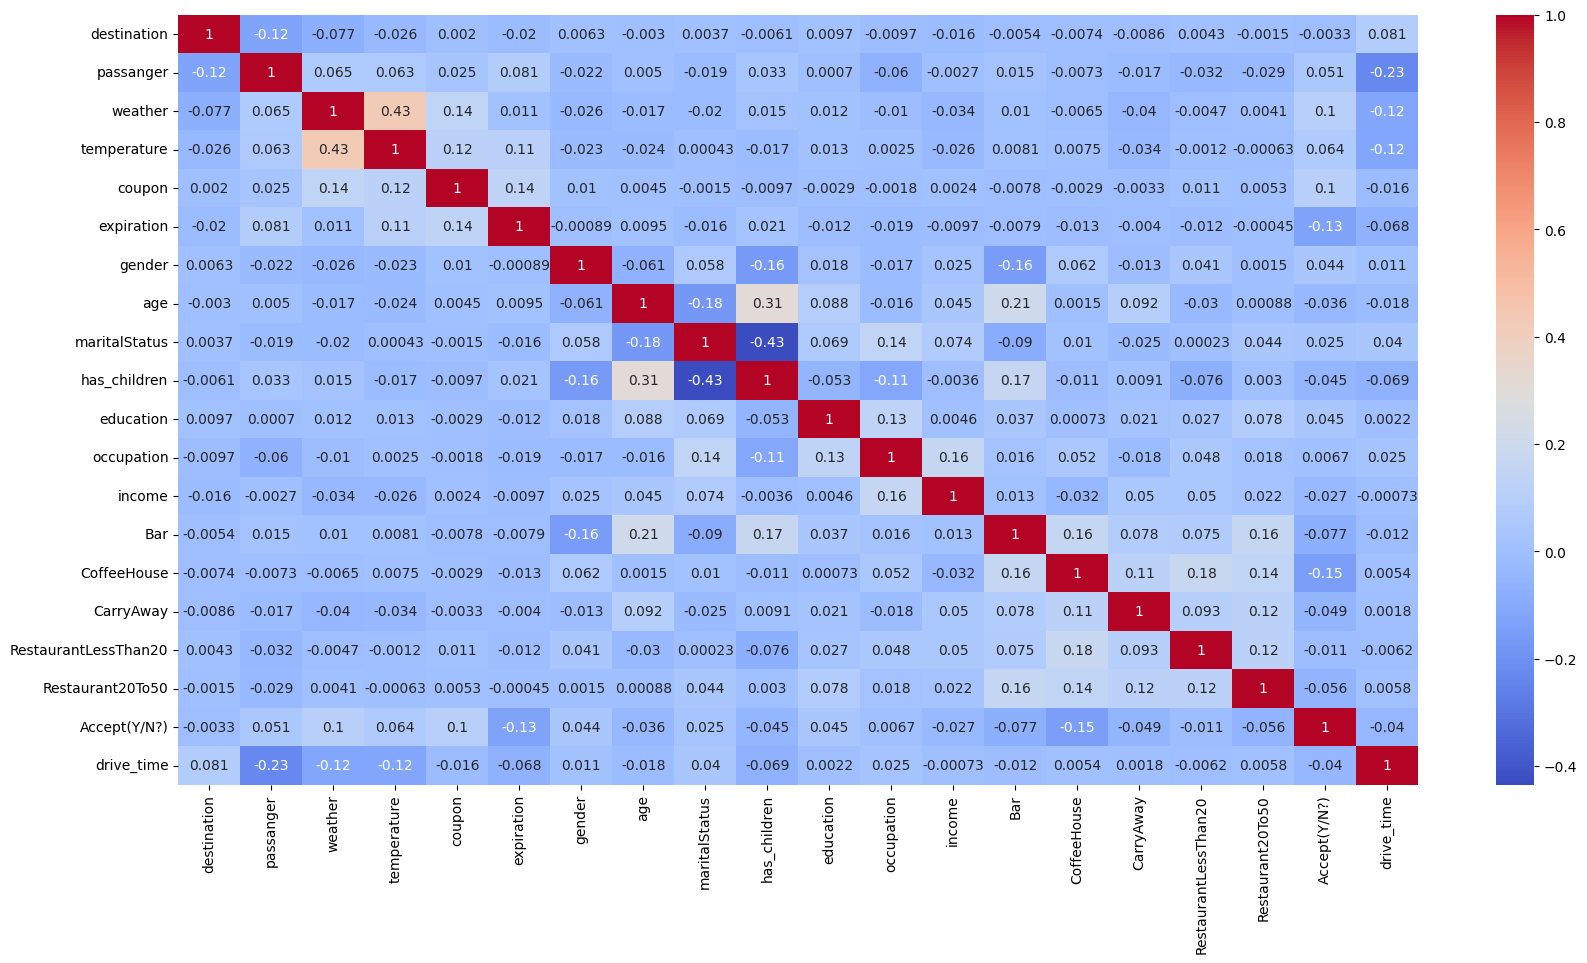

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',)
plt.show()

- We can see that there is no strong relation between the variable martialstatus and has_children with corr coeff of -0.43,
- Hence removing features 'martialstatus' and 'has_children'

In [97]:
df1=df1.drop(['has_children'],axis=1)

In [98]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
destination,12393.0,0.996208,0.711590,0.0,0.0,1.0,2.0,2.0
passanger,12393.0,0.672315,0.946447,0.0,0.0,0.0,1.0,3.0
weather,12393.0,1.698782,0.636002,0.0,2.0,2.0,2.0,2.0
temperature,12393.0,63.252643,19.075396,30.0,55.0,80.0,80.0,80.0
coupon,12393.0,2.049060,1.350590,0.0,1.0,2.0,3.0,4.0
expiration,12393.0,0.440168,0.496427,0.0,0.0,0.0,1.0,1.0
gender,12393.0,0.487211,0.499857,0.0,0.0,0.0,1.0,1.0
age,12393.0,2.601791,2.227025,0.0,1.0,2.0,4.0,7.0
maritalStatus,12393.0,1.710240,0.835215,0.0,1.0,2.0,2.0,4.0
education,12393.0,2.591866,1.883846,0.0,1.0,2.0,5.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

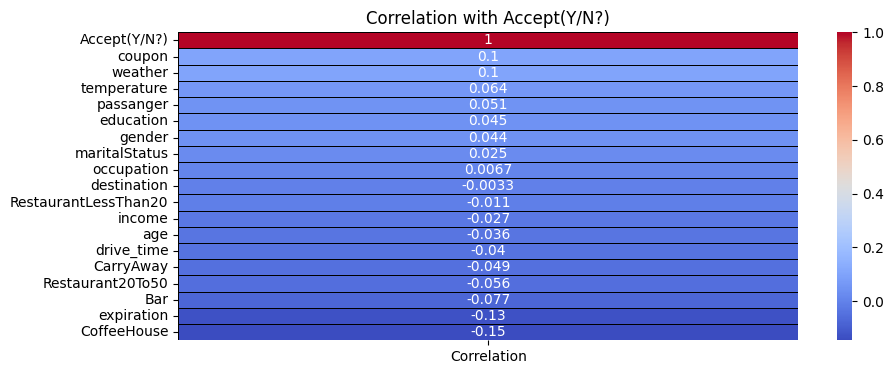

In [99]:
corr = df1.corrwith(df1['Accept(Y/N?)']).sort_values(ascending=False).to_frame()
corr.columns=['Correlation']
plt.subplots(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.4,linecolor='black')
plt.title('Correlation with Accept(Y/N?)')
plt.show

In [100]:
df1.shape

(12393, 19)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12393 non-null  int64
 1   passanger             12393 non-null  int64
 2   weather               12393 non-null  int64
 3   temperature           12393 non-null  int64
 4   coupon                12393 non-null  int64
 5   expiration            12393 non-null  int64
 6   gender                12393 non-null  int64
 7   age                   12393 non-null  int64
 8   maritalStatus         12393 non-null  int64
 9   education             12393 non-null  int64
 10  occupation            12393 non-null  int64
 11  income                12393 non-null  int64
 12  Bar                   12393 non-null  int64
 13  CoffeeHouse           12393 non-null  int64
 14  CarryAway             12393 non-null  int64
 15  RestaurantLessThan20  12393 non-null  int64
 16  Restauran

In [102]:
#Anova Testing -

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

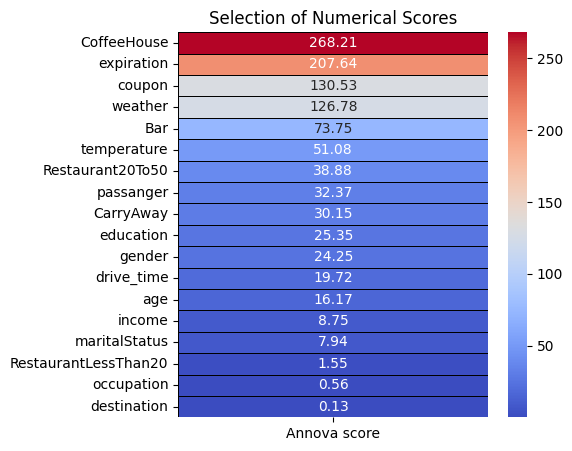

In [104]:
features = df1.drop('Accept(Y/N?)', axis=1)
target = df1['Accept(Y/N?)']

best_features=SelectKBest(score_func= f_classif,k='all')
fit=best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index=list(features.columns),
                             columns=['Annova score'])
plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending=False,by='Annova score'),
            annot=True, cmap='coolwarm',linewidth=0.4,linecolor='black',fmt='.2f')
plt.title('Selection of Numerical Scores')
plt.show()

In [105]:
print(featureScores.nlargest(10,'Annova score'))

                  Annova score
CoffeeHouse         268.206192
expiration          207.639726
coupon              130.526425
weather             126.777566
Bar                  73.752102
temperature          51.081457
Restaurant20To50     38.884068
passanger            32.366198
CarryAway            30.151710
education            25.348909


In [106]:
df1['Accept(Y/N?)'].value_counts(normalize=True)

,proportion
Accept(Y/N?),
1,0.565803
0,0.434197


- Hence the Data is balanced we can proceed to do spliting the data x and y for model building

In [107]:
x= df1.drop('Accept(Y/N?)',axis=1)
y= df1['Accept(Y/N?)']

#Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [109]:
#Spliting the the data to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,random_state=42)

In [110]:
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(9294, 18) (3099, 18) (9294,) (3099,)


#Building Different Models

#Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log = LogisticRegression()
logit = log.fit(x_train,y_train)

y_pred_train_lr = logit.predict(x_train)
y_pred_test_lr = logit.predict(x_test)

train_accuracy_lr = accuracy_score(y_train,y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test,y_pred_test_lr)

In [112]:
print('Training Accuracy:',train_accuracy_lr)
print('Testing Accuracy:',test_accuracy_lr)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_lr))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_lr))

Training Accuracy: 0.6285775769313535
Testing Accuracy: 0.6214908034849952

Training Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.44      0.51      4011
           1       0.65      0.77      0.70      5283

    accuracy                           0.63      9294
   macro avg       0.62      0.61      0.60      9294
weighted avg       0.62      0.63      0.62      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1370
           1       0.63      0.78      0.70      1729

    accuracy                           0.62      3099
   macro avg       0.62      0.60      0.60      3099
weighted avg       0.62      0.62      0.61      3099



#Decision Tree

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dtree = dt.fit(x_train,y_train)

y_pred_train_dtree =  dtree.predict(x_train)
y_pred_test_dtree =  dtree.predict(x_test)

train_accuracy_dt = accuracy_score(y_train,y_pred_train_dtree)
test_accuracy_dt = accuracy_score(y_test,y_pred_test_dtree)

In [115]:
print('Training Accuracy:',train_accuracy_dt)
print('Testing Accuracy:',test_accuracy_dt)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_dtree))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_dtree))

Training Accuracy: 0.991069507208952
Testing Accuracy: 0.6618263956114876

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4011
           1       1.00      0.98      0.99      5283

    accuracy                           0.99      9294
   macro avg       0.99      0.99      0.99      9294
weighted avg       0.99      0.99      0.99      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1370
           1       0.70      0.69      0.69      1729

    accuracy                           0.66      3099
   macro avg       0.66      0.66      0.66      3099
weighted avg       0.66      0.66      0.66      3099



#Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rfc = rf.fit(x_train,y_train)

y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

train_accuracy_rfc = accuracy_score(y_train,y_pred_train_rfc)
test_accuracy_rfc = accuracy_score(y_test,y_pred_test_rfc)

In [117]:
print('Training Accuracy:',train_accuracy_rfc)
print('Testing Accuracy:',test_accuracy_rfc)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_rfc))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_rfc))

Training Accuracy: 0.991069507208952
Testing Accuracy: 0.7266860277508874

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4011
           1       0.99      0.99      0.99      5283

    accuracy                           0.99      9294
   macro avg       0.99      0.99      0.99      9294
weighted avg       0.99      0.99      0.99      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1370
           1       0.74      0.80      0.76      1729

    accuracy                           0.73      3099
   macro avg       0.72      0.72      0.72      3099
weighted avg       0.73      0.73      0.72      3099



#Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gbc = gb.fit(x_train,y_train)

In [119]:
y_pred_train_gbc = gbc.predict(x_train)
y_pred_test_gbc = gbc.predict(x_test)

train_accuracy_gbc = accuracy_score(y_train,y_pred_train_gbc)
test_accuracy_gbc = accuracy_score(y_test,y_pred_test_gbc)

In [120]:
print('Training Accuracy GBC:',train_accuracy_gbc)
print('Testing Accuracy GBC:',test_accuracy_gbc)
print()
print('Training Classification Report GBC:')
print(classification_report(y_train,y_pred_train_gbc))
print('Testing Classification Report GBC:')
print(classification_report(y_test,y_pred_test_gbc))

Training Accuracy GBC: 0.7314396384764364
Testing Accuracy GBC: 0.7241045498547919

Training Classification Report GBC:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      4011
           1       0.74      0.82      0.78      5283

    accuracy                           0.73      9294
   macro avg       0.73      0.72      0.72      9294
weighted avg       0.73      0.73      0.73      9294

Testing Classification Report GBC:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1370
           1       0.72      0.83      0.77      1729

    accuracy                           0.72      3099
   macro avg       0.73      0.71      0.71      3099
weighted avg       0.73      0.72      0.72      3099



#XG Boosting Classifier

In [121]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xgb = xg.fit(x_train,y_train)


In [122]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

train_accuracy_xgb = accuracy_score(y_train,y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test,y_pred_test_xgb)

In [123]:
print('Training Accuracy:',train_accuracy_xgb)
print('Testing Accuracy:',test_accuracy_xgb)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_xgb))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_xgb))

Training Accuracy: 0.9201635463740048
Testing Accuracy: 0.7408841561794127

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4011
           1       0.91      0.95      0.93      5283

    accuracy                           0.92      9294
   macro avg       0.92      0.92      0.92      9294
weighted avg       0.92      0.92      0.92      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1370
           1       0.75      0.80      0.78      1729

    accuracy                           0.74      3099
   macro avg       0.74      0.73      0.73      3099
weighted avg       0.74      0.74      0.74      3099



#Support Vector Machine

In [124]:
from sklearn.svm import SVC

sv= SVC()
svc = sv.fit(x_train,y_train)

y_pred_train_svm = svc.predict(x_train)
y_pred_test_svm = svc.predict(x_test)

train_accuracy_svm = accuracy_score(y_train,y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test,y_pred_test_svm)

In [125]:
print('Training Accuracy:',train_accuracy_svm)
print('Testing Accuracy:',test_accuracy_svm)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_svm))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_svm))

Training Accuracy: 0.5723047127178825
Testing Accuracy: 0.5627621813488222

Training Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.02      0.03      4011
           1       0.57      1.00      0.73      5283

    accuracy                           0.57      9294
   macro avg       0.64      0.51      0.38      9294
weighted avg       0.63      0.57      0.43      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.02      0.03      1370
           1       0.56      0.99      0.72      1729

    accuracy                           0.56      3099
   macro avg       0.64      0.51      0.38      3099
weighted avg       0.63      0.56      0.42      3099



#Navie Bayes Classifier

In [126]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nbc = nb.fit(x_train,y_train)
y_pred_train_nb = nbc.predict(x_train)
y_pred_test_nb = nbc.predict(x_test)

train_accuracy_nb = accuracy_score(y_train,y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test,y_pred_test_nb)


In [127]:
print('Training Accuracy:',train_accuracy_nb)
print('Testing Accuracy:',test_accuracy_nb)
print()
print('Training Classification Report:')
print(classification_report(y_train,y_pred_train_nb))
print('Testing Classification Report:')
print(classification_report(y_test,y_pred_test_nb))

Training Accuracy: 0.6215838175166775
Testing Accuracy: 0.6260083898031623

Training Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      4011
           1       0.64      0.76      0.69      5283

    accuracy                           0.62      9294
   macro avg       0.61      0.60      0.60      9294
weighted avg       0.62      0.62      0.61      9294

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.52      1370
           1       0.64      0.77      0.70      1729

    accuracy                           0.63      3099
   macro avg       0.62      0.61      0.61      3099
weighted avg       0.62      0.63      0.62      3099



# Random forest classsifier  with feature selection part

In [128]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
rfe = RFE(estimator=rf1, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)

In [129]:
pred_train_rf1 = rfe.predict(x_train)
pred_test_rf1 = rfe.predict(x_test)

In [130]:
print('Training Accuracy:',accuracy_score(y_train,pred_train_rf1))
print('Testing Accuracy:',accuracy_score(y_test,pred_test_rf1))

Training Accuracy: 0.9316763503335486
Testing Accuracy: 0.6937721845756696


- Out of all the models the GRADIENT BOOSTING algorithum yielded the better result

In [131]:
print('Training Accuracy GBC:',accuracy_score(y_train,y_pred_train_gbc))
print('Testing Accuracy GBC:',accuracy_score(y_test,y_pred_test_gbc))

Training Accuracy GBC: 0.7314396384764364
Testing Accuracy GBC: 0.7241045498547919


# Cross validation Method

In [132]:
from sklearn.model_selection import cross_val_score
train_score = cross_val_score(gbc,x_train,y_train,cv=5)
test_score = cross_val_score(gbc,x_test,y_test,cv=5)
print('Training Accuracy:',train_score.mean())
print('Testing Accuracy:',test_score.mean())

Training Accuracy: 0.7167003568593369
Testing Accuracy: 0.7147480327270832


#Hyperperameter Tuning
#GridsearchCV

In [133]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,150],
             'learning_rate':[0.05,0.1,0.15],
             'max_depth':[3,5,7]}

gbm_model = GradientBoostingClassifier()
grid_gbm = GridSearchCV(estimator=gbm_model,param_grid=param_grid,cv=5)
grid_gbm.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [134]:
grid_gbm.best_params_

{'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 100}

In [135]:
gbm = GradientBoostingClassifier(learning_rate=0.15,max_depth=5,n_estimators=150)

In [136]:
gbm.fit(x_train,y_train)

y_pred_train_best_param=gbm.predict(x_train)
y_pred_test_best_param=gbm.predict(x_test)

In [137]:
print('Training Accuracy:',accuracy_score(y_train,y_pred_train_best_param))
print('Testing Accuracy:',accuracy_score(y_test,y_pred_test_best_param))

Training Accuracy: 0.8531310522918012
Testing Accuracy: 0.7454017424975798


#ROC-AUC CURVE

In [138]:
from sklearn.metrics import roc_curve,roc_auc_score
gbc_roc_auc= roc_auc_score(y_test,y_pred_test_gbc)
gbc_roc_auc

0.7103110105415138

In [139]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred_test_gbc)
print('False Positive Rate:',fpr)
print('True Positive Rate:',tpr)
print('Threshold:',thresholds)

False Positive Rate: [0.         0.40875912 1.        ]
True Positive Rate: [0.         0.82938115 1.        ]
Threshold: [inf  1.  0.]


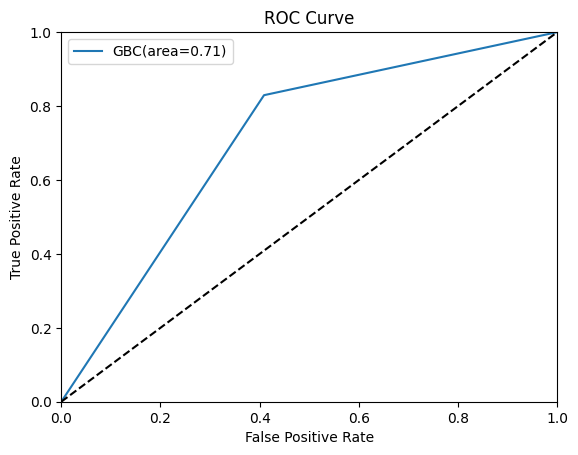

In [140]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred_test_gbc)
plt.figure()
plt.plot(fpr,tpr,label='GBC(area=%0.2f)'%gbc_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()

#Accuracy Score Comparsion of Different Models

In [141]:
list1 = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','XGBoost','SVM','Naive Bayes']
list2 = [train_accuracy_lr,train_accuracy_dt,train_accuracy_rfc,train_accuracy_gbc,train_accuracy_xgb,train_accuracy_svm,train_accuracy_nb]
list3 = [test_accuracy_lr,test_accuracy_dt,test_accuracy_rfc,test_accuracy_gbc,test_accuracy_xgb,test_accuracy_svm,test_accuracy_nb]

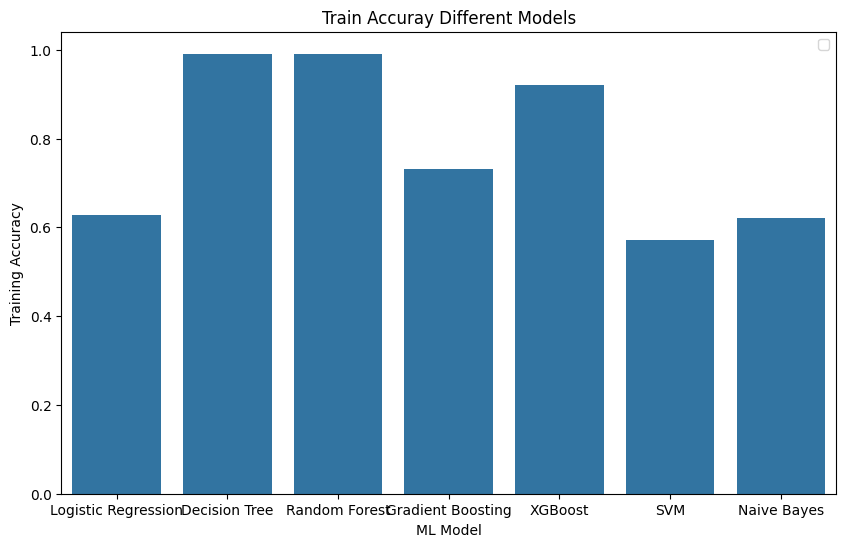

In [142]:
Model_accuracy_data= {'ML Model': list1,
        'Training Accuracy': list2,
        'Testing Accuracy': list3
        }

Model_accuracy_data= pd.DataFrame(Model_accuracy_data)

plt.figure(figsize=(10,6))
sns.barplot(x='ML Model',y='Training Accuracy',data=Model_accuracy_data)
plt.ylabel('Training Accuracy')
plt.title('Train Accuray Different Models')
plt.legend(loc='upper right')
plt.show()

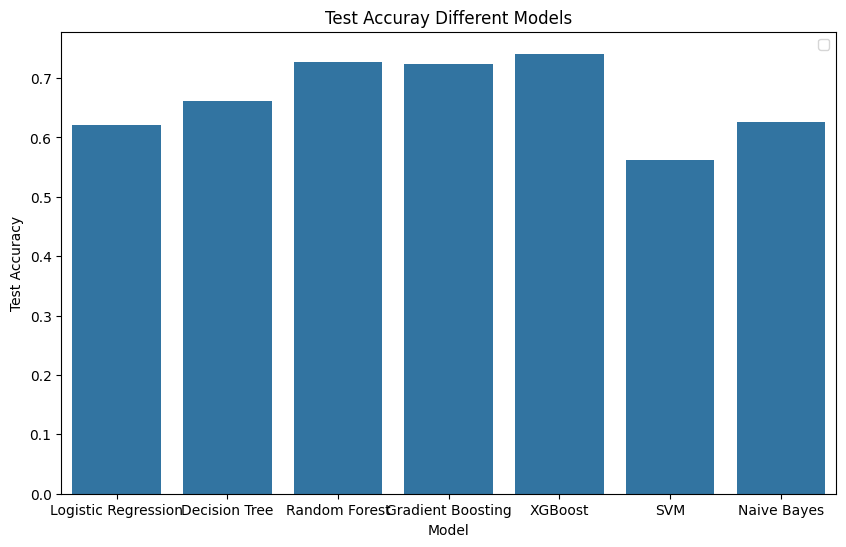

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(x='ML Model',y='Testing Accuracy',data=Model_accuracy_data)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuray Different Models')
plt.legend(loc='upper right')
plt.show()

In [144]:
Model_accuracy_data

,ML Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.628578,0.621491
1,Decision Tree,0.991070,0.661826
2,Random Forest,0.991070,0.726686
3,Gradient Boosting,0.731440,0.724105
4,XGBoost,0.920164,0.740884
5,SVM,0.572305,0.562762
6,Naive Bayes,0.621584,0.626008


#Feature Importance

Text(0, 0.5, 'Features')

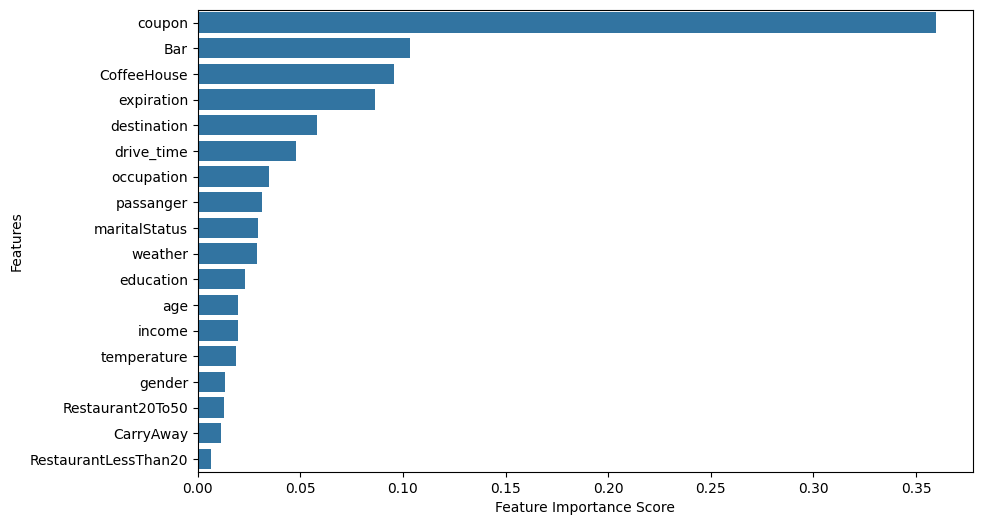

In [145]:
plt.figure(figsize=(10,6))
sorted_features = pd.Series(gbc.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=sorted_features,y=sorted_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

#ROC and AUC Curve Comparsion of Different Models

In [146]:
lr_roc_auc= roc_auc_score(y_test,y_pred_test_lr)
dtree_roc_auc= roc_auc_score(y_test,y_pred_test_dtree)
rfc_roc_auc= roc_auc_score(y_test,y_pred_test_rfc)
gbc_roc_auc= roc_auc_score(y_test,y_pred_test_gbc)
xgb_roc_auc= roc_auc_score(y_test,y_pred_test_xgb)
svm_roc_auc= roc_auc_score(y_test,y_pred_test_svm)
nb_roc_auc= roc_auc_score(y_test,y_pred_test_nb)

In [147]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_test_lr)
fpr1,tpr1,threshold1 = roc_curve(y_test,y_pred_test_dtree)
fpr2,tpr2,threshold2 = roc_curve(y_test,y_pred_test_rfc)
fpr3,tpr3,threshold3 = roc_curve(y_test,y_pred_test_gbc)
fpr4,tpr4,threshold4 = roc_curve(y_test,y_pred_test_xgb)
fpr5,tpr5,threshold5 = roc_curve(y_test,y_pred_test_svm)
fpr6,tpr6,threshold6 = roc_curve(y_test,y_pred_test_nb)


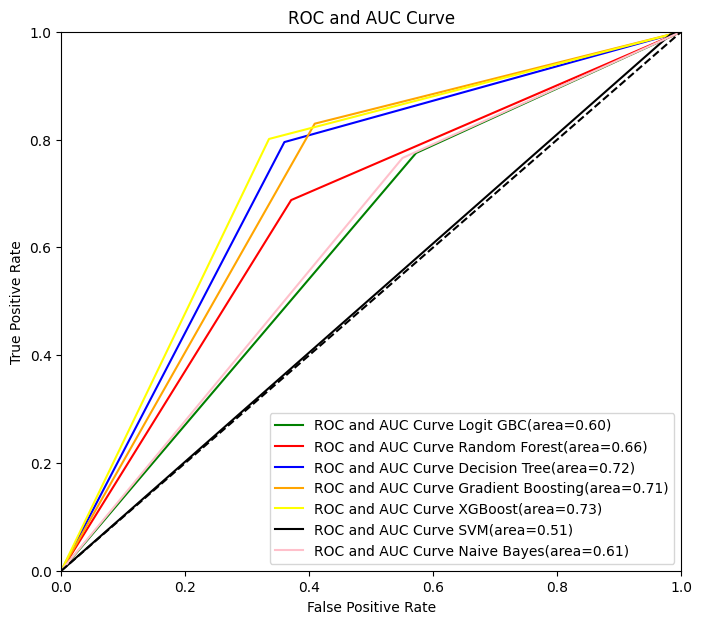

In [148]:
plt.figure(figsize=(8,7))
plt.plot(fpr,tpr,label='ROC and AUC Curve Logit GBC(area=%0.2f)'%lr_roc_auc, color='green')
plt.plot(fpr1,tpr1,label='ROC and AUC Curve Random Forest(area=%0.2f)'%dtree_roc_auc, color='red')
plt.plot(fpr2,tpr2,label='ROC and AUC Curve Decision Tree(area=%0.2f)'%rfc_roc_auc, color='blue')
plt.plot(fpr3,tpr3,label='ROC and AUC Curve Gradient Boosting(area=%0.2f)'%gbc_roc_auc, color='orange')
plt.plot(fpr4,tpr4,label='ROC and AUC Curve XGBoost(area=%0.2f)'%xgb_roc_auc, color='yellow')
plt.plot(fpr5,tpr5,label='ROC and AUC Curve SVM(area=%0.2f)'%svm_roc_auc, color='black')
plt.plot(fpr6,tpr6,label='ROC and AUC Curve Naive Bayes(area=%0.2f)'%nb_roc_auc, color='pink')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC Curve')
plt.show()

In [149]:
training_accuracy_cv_xgb = cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10)
testing_accuracy_cv_xgb = cross_val_score(estimator=xgb,X=x_test,y=y_test,cv=10)
print('Training Accuracy:',training_accuracy_cv_xgb.mean())
print('Testing Accuracy:',testing_accuracy_cv_xgb.mean())

Training Accuracy: 0.7431690915193815
Testing Accuracy: 0.7099164839753627


In [150]:
training_accuracy_cv_dt = cross_val_score(estimator=dtree,X=x_train,y=y_train,cv=10)
testing_accuracy_cv_dt = cross_val_score(estimator=dtree,X=x_test,y=y_test,cv=10)
print('Training Accuracy:',training_accuracy_cv_dt.mean())
print('Testing Accuracy:',testing_accuracy_cv_dt.mean())

Training Accuracy: 0.6660208109077862
Testing Accuracy: 0.6369913352124439


#Gradient Boosting algorithum giving Good result

#Accuracy of Gradient Boosting

In [151]:
print('Training Accuracy:',accuracy_score(y_train,y_pred_train_gbc))
print('Testing Accuracy:',accuracy_score(y_test,y_pred_test_gbc))

Training Accuracy: 0.7314396384764364
Testing Accuracy: 0.7241045498547919


#Classification Report of Gradient Boosting

In [152]:
print(classification_report(y_test,y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1370
           1       0.72      0.83      0.77      1729

    accuracy                           0.72      3099
   macro avg       0.73      0.71      0.71      3099
weighted avg       0.73      0.72      0.72      3099



#Confusion matrix of Gradient Boosting

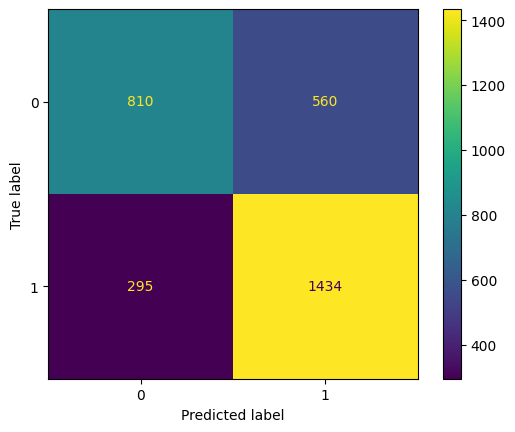

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test_gbc)).plot()
plt.show()

In [154]:
cm = confusion_matrix(y_test,y_pred_test_gbc)

pd.crosstab(y_test.values.flatten(),y_pred_test_gbc,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,810,560,1370
1,295,1434,1729
All,1105,1994,3099


- Customer who did not use coupons in actual are 1370
- Customer who did use coupons in actual are 1729
- Predicted cuatomers who did not use coupons are 1102
- predicted customers who use coupons are 1997

In [155]:
#Creating CSV file with the different model accuracies in csv file

In [156]:
Model_accuracy_data.to_csv('Model_accuracy_data.csv',index=False)